### Пожертвования - Таблица с пожертвованиями доноров

- **id** - Идентификатор пожертвования;

- **donor_id** - Идентификатор донора (таблица "Доноры");

- **purpose_id** - Идентификатор цели сбора (таблица "Цели сбора");

- **transaction_id** - Идентификатор транзакции (таблица "Транзакции");

- **recurring_id** - Идентификатор рекуррентного платежа (платеж, который автоматически списывается каждый месяц с привязанной карты донора);

- **when** - Дата и время пожертвования;

- **amount и amount_total** - Сумма (с удержанной возможной комиссией) и общая сумма платежа;

- **category** - Тип оплаты (карта, СБП и т.д.);

- **gateway** - Платежная система;

- **device_type** - Тип устройства, с которого оформлялось пожертвование;

- **os** - Операционная система на устройстве;

- **status** - Статус платежа;

1 - Новый (начата процедура оформления платежа пожертвования)

2 - Авторизованный (пользователь ввел одноразовый код от своего банка, авторизовав платеж)

3 - Завершенный (платеж успешно прошел)

4 - По пожертвованию был оформлен возврат

5 - Отклоненный (платеж после авторизации был отклонен банком. например, нет денег на счете)

### Транзакции - Таблица с платежными транзакциями

- **id** - Идентификатор транзакции;

- **when** - Дата и время транзакции;

- **amount** - Сумма платежа;

- **currency** - Валюта платежа;

- **ipcountry** - Страна, определенная по IP адресу;

- **ipregion** - Регион, определенный по IP адресу;

### Доноры - Информация о донорах

- **id** - Идентификатор донора;

- **sex** - Пол донора;

### Цели сборов - Информация о целях сборов благотворительных фондов
- **id** - Идентификатор цели сбора
- **fund_id** - Идентификатор благотворительного фонда

объединим данные в один датасет для простоты

In [1]:
import pandas as pd

In [2]:
donors_df = pd.read_csv('Доноры.csv', sep=';')
donations_df = pd.read_csv('Пожертвования.csv', sep=';')
tranzactions_df = pd.read_csv('Транзакции.csv', sep=';')
purpose_df = pd.read_csv('Цели сборов.csv', sep=';')

C:\Users\Huawei\AppData\Local\Temp\ipykernel_25332\3781895484.py:2: DtypeWarning: Columns (8,10,12) have mixed types. Specify dtype option on import or set low_memory=False.
  donations_df = pd.read_csv('Пожертвования.csv', sep=';')
C:\Users\Huawei\AppData\Local\Temp\ipykernel_25332\3781895484.py:3: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  tranzactions_df = pd.read_csv('Транзакции.csv', sep=';')


In [3]:
# сначала оценим таблицу "Доноры"
# начнем с проверки дубликатов 

print(f'количество дубликатов в таблице "Доноры": {donors_df["id"].duplicated().sum()}')
donors_df = donors_df.drop_duplicates(subset=['id'])
print(f'количество дубликатов в таблице "Доноры": {donors_df["id"].duplicated().sum()}')

количество дубликатов в таблице "Доноры": 2586
количество дубликатов в таблице "Доноры": 0


In [4]:
# перейдем к таблице Пожертвования 
# проверка дубликатов

print(f'количество пожертвований с разным статусом: {donations_df.shape[0]}')
print(f'количество дубликтов в таблице пожертвований: {donations_df["id"].duplicated().sum()}')

# оценим соответствуют ли описанию статусы
donations_df.status.value_counts()

количество пожертвований с разным статусом: 472987
количество дубликтов в таблице пожертвований: 0


status
 3    354646
 5    112182
-1      4625
 1      1175
 2       226
 4       114
 6        19
Name: count, dtype: int64

In [5]:
# посмотрим на доноров у которых есть статус 4 - возврат
# если был возврат, значит должно было быть пожертвование со статусом 3
# проверим, был ли статус 3 у этих доноров
# если нет то в случае наличия транзакций с неизвестными статусами присвоим им 3

In [6]:
# получаем id

ids_4 = donations_df[donations_df['status']==4]['donor_id'].unique()
len(ids_4)

82

In [7]:
# 82 донора осуществляли возврат, проверим, осуществляли ли они пожертвования

temp = donations_df[donations_df['donor_id'].isin(ids_4)]
tmp = temp.groupby('donor_id')['status'].value_counts().reset_index()
tmp.head()

,donor_id,status,count
0,015171695df4e4cbd5bc77c92b3ebd10,3,4
1,015171695df4e4cbd5bc77c92b3ebd10,4,2
2,0350f008d884eba79252200eec455c82,-1,11
3,0350f008d884eba79252200eec455c82,3,3
4,0350f008d884eba79252200eec455c82,4,1


In [8]:
# проверяем, что возврат встречается не чаще чем пожертвования

for id_ in tmp['donor_id'].unique():
    print(id_)
    print(tmp[tmp['donor_id']==id_])
    print('\n')    

015171695df4e4cbd5bc77c92b3ebd10
                           donor_id  status  count
0  015171695df4e4cbd5bc77c92b3ebd10       3      4
1  015171695df4e4cbd5bc77c92b3ebd10       4      2


0350f008d884eba79252200eec455c82
                           donor_id  status  count
2  0350f008d884eba79252200eec455c82      -1     11
3  0350f008d884eba79252200eec455c82       3      3
4  0350f008d884eba79252200eec455c82       4      1


067f0055cf51793692a8ea362bf06800
                           donor_id  status  count
5  067f0055cf51793692a8ea362bf06800       3    277
6  067f0055cf51793692a8ea362bf06800       4      1


0b0af7cf76efe0f71afbac4af346c0b8
                           donor_id  status  count
7  0b0af7cf76efe0f71afbac4af346c0b8      -1     14
8  0b0af7cf76efe0f71afbac4af346c0b8       3      7
9  0b0af7cf76efe0f71afbac4af346c0b8       4      2


0fbedb185d5311c61280d2001bbdee5c
                            donor_id  status  count
10  0fbedb185d5311c61280d2001bbdee5c       3     14
11  0fbed

                             donor_id  status  count
111  a5c51f0ef331f352450f711f7e41938b       3      3
112  a5c51f0ef331f352450f711f7e41938b       4      1


a7e0a0833c8c441198c894fe72c90f60
                             donor_id  status  count
113  a7e0a0833c8c441198c894fe72c90f60       3      3
114  a7e0a0833c8c441198c894fe72c90f60       4      1


aec52250262baeabb65bc1c5e09f40c0
                             donor_id  status  count
115  aec52250262baeabb65bc1c5e09f40c0       4      1


afbcb57c3f4ff7fdbed929fc2b758d10
                             donor_id  status  count
116  afbcb57c3f4ff7fdbed929fc2b758d10       4      1


b32cad5aea8f8bfb7904bda7aef54121
                             donor_id  status  count
117  b32cad5aea8f8bfb7904bda7aef54121       4      1
118  b32cad5aea8f8bfb7904bda7aef54121       3      1
119  b32cad5aea8f8bfb7904bda7aef54121      -1      1


b5ba0efc39ad290a5c98d5f1bbdb004d
                             donor_id  status  count
120  b5ba0efc39ad290a5c98d5f1b

In [9]:
# был один возврат, но не было других транзакций
only_4_status = ['187f284f2a625286ce127df191fbba94', '1b549ff18ed05e4932ac57a2efb93cfd', '2737b4c9f9469ca7fdc061115799a91f',
                 '2aaf452fea6721305421190d7173ec5e', '3635ec58ca8c1ce62b31600b32d25165', '4449544e8f492f87cf89446e90a307c2',
                 '44a0080c9d00abb44d494e704c35e12d', '7e8f57fb0cdc05e30de177fd8566c894', '82824273e9d56ef9552f1530bb905d19',
                 '861afd4e187029745b8eb987ce1065ba', '880476a63aab78ef7fb1c7f97f9ab14a', '94a20cbfeef6db1d849657d4f4967b18',
                 'a27e452acfffed6cf035bbace6be47af', 'aec52250262baeabb65bc1c5e09f40c0', 'afbcb57c3f4ff7fdbed929fc2b758d10',
                 'bc85398263e86175a39423b604c7afe4', 'bfeb71e407832e866c453437055ee94a', 'ccb2608d7ddd06c7ac56407e6e19c949',
                 'ec464e00feefb4cb678b865cf1bed9e3', 'eeadfa1e9e5145f0cb261726aec6b070', 'f22e14760a44b62f634f30c510e1207e',
                 'f8ed9f07a7c99c75f7123836c9403825']

# только транзакции в статусе 4 и 5
only_4_and_5_status = ['66fc8d8724de73016428a873fa5c49b2', '6b207de53da7afb965b7b26191243cb7']

# был возврат и транзакция с неизвестным статусом
only_4_and_unknow_status = ['67d892d7d49c393dabe32794138aaab1', 'e530f04e07f989db7fea01a0e1b0557e']

# были пожертвования и вовзрат в равном количестве (фактически не жертвовал)
returned_donation = ['1cb4c44c0d1b883e1771376debf87b4f', '1d1fb540c4c118b0acd2bd200a403436', '21d8377d0c0d4bc305645fefba6a46e1',
                     '525ceba5dbd514d2a83bbda53331a4a9', '52b081c8eb41656b6cb56530c2f2df1a', '61887e9da9a4cb56535b0377e28abb35',
                     '65ab81e7dd3df787e10bd337b4e6710c', '78650a5f5d96b42588163993b6201bee', '977731a963b96ab302a8c6a36897924a',
                     'b32cad5aea8f8bfb7904bda7aef54121', 'bbb6856a9de00231c01ddca80fee5f32', 'c0429bef575b15c2b29c042adadc1db4',
                     'cd173ddf0f1e20a7d077b91b4e78b776', 'f71d23e76db89728b6a65f4eb80f745e', 'fcda9e7d486a2505bd26e0af5a9c1efb']

In [10]:
# записи с донором 8a658517fd414044e03969015b7d641b лучше удалить, так как у него очень странные статусы

donations_df = donations_df[donations_df['donor_id']!='8a658517fd414044e03969015b7d641b']
donations_df.shape

(472980, 13)

In [11]:
# для доноров, у которых был возврат и транзакция с неизвестным статусом, присвоим статус 3 вместо неизвестного

donations_df[donations_df['donor_id'].isin(only_4_and_unknow_status)]

,id,donor_id,purpose_id,transaction_id,recurring_id,status,when,amount,amount_total,category,device_type,gateway,os
452591,d1e178e8afe3f0768984985366c07c54,e530f04e07f989db7fea01a0e1b0557e,7c710d616cb26b32e53b2ae54c24f2f2,93937bf2b262b475cae58cd2cb71e1ba,NaN,-1,2021-06-05 16:24:42,"293,1",300,mir,mobile,cloudpayments,Android
452595,15fe557d260cadd70d26cbbc29b6347e,e530f04e07f989db7fea01a0e1b0557e,7c710d616cb26b32e53b2ae54c24f2f2,d0880d4d4b0e6bef04684fb654b166fd,NaN,4,2021-06-05 16:27:07,"291,6",300,sberbank,mobile,yandex,Android
470977,008f8c173f76ddd4c598a809c8d18e04,67d892d7d49c393dabe32794138aaab1,fed409545bbfdfb7cc39a44ecd1db02a,e6243db48033c59687b09923a6c7fb15,NaN,4,2021-06-27 16:17:46,500,500,sberbank,mobile,yandex,Android
471024,9010d34690130db12781a5f7ac194fe7,67d892d7d49c393dabe32794138aaab1,fed409545bbfdfb7cc39a44ecd1db02a,b9b4af305ad4479f89cf71dfd4fa55b0,NaN,-1,2021-06-27 16:18:08,486,500,card,mobile,mixplat,Android


In [12]:
donations_df.loc[donations_df['id']=='d1e178e8afe3f0768984985366c07c54', 'status']=3
donations_df.loc[donations_df['id']=='9010d34690130db12781a5f7ac194fe7', 'status']=3
donations_df[donations_df['donor_id'].isin(only_4_and_unknow_status)]

,id,donor_id,purpose_id,transaction_id,recurring_id,status,when,amount,amount_total,category,device_type,gateway,os
452591,d1e178e8afe3f0768984985366c07c54,e530f04e07f989db7fea01a0e1b0557e,7c710d616cb26b32e53b2ae54c24f2f2,93937bf2b262b475cae58cd2cb71e1ba,NaN,3,2021-06-05 16:24:42,"293,1",300,mir,mobile,cloudpayments,Android
452595,15fe557d260cadd70d26cbbc29b6347e,e530f04e07f989db7fea01a0e1b0557e,7c710d616cb26b32e53b2ae54c24f2f2,d0880d4d4b0e6bef04684fb654b166fd,NaN,4,2021-06-05 16:27:07,"291,6",300,sberbank,mobile,yandex,Android
470977,008f8c173f76ddd4c598a809c8d18e04,67d892d7d49c393dabe32794138aaab1,fed409545bbfdfb7cc39a44ecd1db02a,e6243db48033c59687b09923a6c7fb15,NaN,4,2021-06-27 16:17:46,500,500,sberbank,mobile,yandex,Android
471024,9010d34690130db12781a5f7ac194fe7,67d892d7d49c393dabe32794138aaab1,fed409545bbfdfb7cc39a44ecd1db02a,b9b4af305ad4479f89cf71dfd4fa55b0,NaN,3,2021-06-27 16:18:08,486,500,card,mobile,mixplat,Android


In [13]:
# будем считать, что восстановили два статуса из черновиков
# посмотрим еще раз на статусы

donations_df.status.value_counts()

status
 3    354648
 5    112182
-1      4617
 1      1175
 2       226
 4       113
 6        19
Name: count, dtype: int64

In [14]:
# статусы 6, 2, 1, -1  не являются конечными, могут зашумлять данные, так как суммарно их всего 6000, то удалим

donations_df = donations_df[~donations_df.status.isin([6, 2, 1, -1])]
donations_df.status.value_counts()

status
3    354648
5    112182
4       113
Name: count, dtype: int64

In [15]:
# проверим все ли доноры из соответствующей таблицы осуществляли транзакции

print(f'количество доноров в таблице "Пожертвования": {len(donations_df["donor_id"].unique())}')
print(f'количество доноров в таблице "Доноры": {donors_df.shape[0]}')

количество доноров в таблице "Пожертвования": 207830
количество доноров в таблице "Доноры": 232076


In [16]:
# видим, что доноров больше, чем фактически сделавших транзакции, избавимся от лишних, так как мы знаем о них только пол

ids = donations_df["donor_id"].unique()
donors_df = donors_df[donors_df['id'].isin(ids)]   
print(f'количество доноров из таблицы "Доноры", которые действительно осуществляли транзакции: {donors_df.shape[0]}')

количество доноров из таблицы "Доноры", которые действительно осуществляли транзакции: 56136


In [17]:
# это намного меньше, чем количество доноров из таблицы, поэтому создадим свою таблицу с донорами

new_donors_df = pd.DataFrame(donations_df['donor_id'].unique(), columns=['id'])
new_donors_df = new_donors_df.merge(donors_df, on='id', how='left')
print(f'итоговое количество доноров, с которыми мы будем работать: {new_donors_df.shape[0]}')
print('\nНОВАЯ ТАБЛИЦА С ДОНОРАМИ')
new_donors_df

итоговое количество доноров, с которыми мы будем работать: 207830

НОВАЯ ТАБЛИЦА С ДОНОРАМИ


,id,sex
0,70a16408d291cbe843893174919a561a,m
1,7c9bc4fb1bb133cef5a68710fff911d8,f
2,6281148700f119139418212037fe85aa,m
3,faee8f97a290186dcb6a4c798550637f,m
4,406d9953fd5ed6c1ca968d867b68b1af,f
...,...,...
207825,f75a378fa82cc78693964b8360fe6783,NaN
207826,d01e84026ca9d987e06e3aa2708988a6,f
207827,71bcd2ce63398b3090aa656442215751,NaN
207828,04215bc55d8f2eff99a24eab3273fbe8,NaN


In [18]:
# добавим в новую таблицу метку для тех, кто возвращал все пожертвования

new_donors_df['only_returned_donation'] = new_donors_df['id'].isin(returned_donation).astype('int')
assert set(new_donors_df[new_donors_df['only_returned_donation']==1]['id'].unique()) == set(returned_donation)

In [19]:
new_donors_df

,id,sex,only_returned_donation
0,70a16408d291cbe843893174919a561a,m,0
1,7c9bc4fb1bb133cef5a68710fff911d8,f,0
2,6281148700f119139418212037fe85aa,m,0
3,faee8f97a290186dcb6a4c798550637f,m,0
4,406d9953fd5ed6c1ca968d867b68b1af,f,0
...,...,...,...
207825,f75a378fa82cc78693964b8360fe6783,NaN,0
207826,d01e84026ca9d987e06e3aa2708988a6,f,0
207827,71bcd2ce63398b3090aa656442215751,NaN,0
207828,04215bc55d8f2eff99a24eab3273fbe8,NaN,0


In [20]:
# посмотрим на оставшиеся таблицы

print(f'количество записей в таблице "Транзакции": {tranzactions_df.shape[0]}')
print(f'количество дубликатов в транзакциях: {tranzactions_df["id"].duplicated().sum()}')

print(f'количество записей в таблице "Цели сборов": {purpose_df.shape[0]}')
print(f'количество дубликатов в целях сборов: {purpose_df["id"].duplicated().sum()}')

количество записей в таблице "Транзакции": 444556
количество дубликатов в транзакциях: 0
количество записей в таблице "Цели сборов": 1025
количество дубликатов в целях сборов: 0


In [21]:
# подсоединим данные 

data = donations_df.merge(tranzactions_df, left_on='transaction_id', right_on='id', how='left')
assert data.shape[0] == donations_df.shape[0]
data.head(3)

,id_x,donor_id,purpose_id,transaction_id,recurring_id,status,when_x,amount_x,amount_total,category,device_type,gateway,os,id_y,when_y,amount_y,currency,ipcountry,ipregion
0,60e72b5a985f702c62fef16ea95d403d,70a16408d291cbe843893174919a561a,00668da16a708df9a54fa76ef97d5e77,79c76370621c03d9dee3cc57379ffa8d,NaN,3,2012-02-25 17:05:00,1000,1000,BankCard,NaN,robokassa,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,802a10be56e88026eaa9aa773d0890c8,7c9bc4fb1bb133cef5a68710fff911d8,00668da16a708df9a54fa76ef97d5e77,5d6784d7a62353300844fc5e3d8b8764,NaN,3,2012-02-25 19:14:00,400,400,BankCard,NaN,robokassa,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0dfd96e197c13c27b462f2d95342a757,6281148700f119139418212037fe85aa,c442f6d4d05db5941a5642e8fbabc7b1,0ca4d2acd9c7c00d483b58889c286454,NaN,3,2012-02-27 11:23:00,1,1,BankCard,NaN,robokassa,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
# видим, что колонки when и amount дублируются, посмотрим на схожесть значений

data[(data['when_x'].notnull()) & (data['when_y'].notnull())][['when_x', 'when_y']]

,when_x,when_y
1769,2012-10-29 16:28:00,2012-10-29 16:29:32
1770,2012-10-29 16:52:00,2012-10-29 16:54:10
1771,2012-10-29 17:28:00,2012-10-29 17:29:18
1772,2012-10-29 17:28:00,2012-10-29 17:32:36
1773,2012-10-29 17:35:00,2012-10-29 17:36:52
...,...,...
466938,2021-06-30 23:21:00,2021-06-30 23:06:21
466939,2021-06-30 23:30:00,2021-06-30 23:06:30
466940,2021-06-30 23:31:21,2021-06-30 20:31:19
466941,2021-06-30 23:35:00,2021-06-30 23:06:35


In [23]:
# одна и та же инфа с задержкой в основном в минуты, значит when_y не нужна

In [24]:
# аналогично проверим количество

data[data['amount_y'].notnull()][['amount_x', 'amount_y']]

,amount_x,amount_y
1769,1,1
1770,10000,10000
1771,1000,1000
1772,100,100
1773,500,500
...,...,...
466938,1441,1500
466939,487,500
466940,200,200
466941,2883,3000


In [25]:
# все аналогично, разница маленькая, колонка amount_y не нужна

In [26]:
print(f'список колонок\n{list(data.columns)}\n\nколичество колонок\n {data.shape[1]}')

список колонок
['id_x', 'donor_id', 'purpose_id', 'transaction_id', 'recurring_id', 'status', 'when_x', 'amount_x', 'amount_total', 'category', 'device_type', 'gateway', 'os', 'id_y', 'when_y', 'amount_y', 'currency', 'ipcountry', 'ipregion']

количество колонок
 19


In [27]:
# избавимся от ненужных колонок

data.drop(['id_y', 'when_y', 'amount_y'], inplace=True, axis=1)
print(f'текущий размер датасета: {data.shape}')
data.head(2)

текущий размер датасета: (466943, 16)


,id_x,donor_id,purpose_id,transaction_id,recurring_id,status,when_x,amount_x,amount_total,category,device_type,gateway,os,currency,ipcountry,ipregion
0,60e72b5a985f702c62fef16ea95d403d,70a16408d291cbe843893174919a561a,00668da16a708df9a54fa76ef97d5e77,79c76370621c03d9dee3cc57379ffa8d,NaN,3,2012-02-25 17:05:00,1000,1000,BankCard,NaN,robokassa,NaN,NaN,NaN,NaN
1,802a10be56e88026eaa9aa773d0890c8,7c9bc4fb1bb133cef5a68710fff911d8,00668da16a708df9a54fa76ef97d5e77,5d6784d7a62353300844fc5e3d8b8764,NaN,3,2012-02-25 19:14:00,400,400,BankCard,NaN,robokassa,NaN,NaN,NaN,NaN


In [28]:
# добавим теперь информацию из таблицы про доноров 

data = data.merge(new_donors_df, left_on='donor_id', right_on='id', how='left')
data.drop('id', inplace=True, axis=1)
print(f'текущий размер датасета: {data.shape}')
data.head(2)

текущий размер датасета: (466943, 18)


,id_x,donor_id,purpose_id,transaction_id,recurring_id,status,when_x,amount_x,amount_total,category,device_type,gateway,os,currency,ipcountry,ipregion,sex,only_returned_donation
0,60e72b5a985f702c62fef16ea95d403d,70a16408d291cbe843893174919a561a,00668da16a708df9a54fa76ef97d5e77,79c76370621c03d9dee3cc57379ffa8d,NaN,3,2012-02-25 17:05:00,1000,1000,BankCard,NaN,robokassa,NaN,NaN,NaN,NaN,m,0
1,802a10be56e88026eaa9aa773d0890c8,7c9bc4fb1bb133cef5a68710fff911d8,00668da16a708df9a54fa76ef97d5e77,5d6784d7a62353300844fc5e3d8b8764,NaN,3,2012-02-25 19:14:00,400,400,BankCard,NaN,robokassa,NaN,NaN,NaN,NaN,f,0


In [29]:
# наконец добавим цели сборов

data = data.merge(purpose_df, left_on='purpose_id', right_on='id', how='left')
data.drop(['id', 'purpose_id'], inplace=True, axis=1)
print(f'текущий размер датасета: {data.shape}')
data.head(2)

текущий размер датасета: (466943, 18)


,id_x,donor_id,transaction_id,recurring_id,status,when_x,amount_x,amount_total,category,device_type,gateway,os,currency,ipcountry,ipregion,sex,only_returned_donation,fund_id
0,60e72b5a985f702c62fef16ea95d403d,70a16408d291cbe843893174919a561a,79c76370621c03d9dee3cc57379ffa8d,NaN,3,2012-02-25 17:05:00,1000,1000,BankCard,NaN,robokassa,NaN,NaN,NaN,NaN,m,0,e3fd213a01aee164f475152137a83eec
1,802a10be56e88026eaa9aa773d0890c8,7c9bc4fb1bb133cef5a68710fff911d8,5d6784d7a62353300844fc5e3d8b8764,NaN,3,2012-02-25 19:14:00,400,400,BankCard,NaN,robokassa,NaN,NaN,NaN,NaN,f,0,e3fd213a01aee164f475152137a83eec


In [30]:
# поправим названия колонок

data.rename(columns={'id_x': 'id', 'when_x': 'when', 'amount_x': 'amount'}, inplace=True)
data.sort_values(by='when')
data['when'] = pd.to_datetime(data['when'])
data.head(1)

,id,donor_id,transaction_id,recurring_id,status,when,amount,amount_total,category,device_type,gateway,os,currency,ipcountry,ipregion,sex,only_returned_donation,fund_id
0,60e72b5a985f702c62fef16ea95d403d,70a16408d291cbe843893174919a561a,79c76370621c03d9dee3cc57379ffa8d,NaN,3,2012-02-25 17:05:00,1000,1000,BankCard,NaN,robokassa,NaN,NaN,NaN,NaN,m,0,e3fd213a01aee164f475152137a83eec


In [31]:
# оценим разницу между amount и total_amount 

data['amount'] = data['amount'].astype(str).str.replace(',', '.').astype(float)
data['amount_total'] = data['amount_total'].astype(str).str.replace(',', '.').astype(float)
data['diff'] = abs(data['amount_total'] - data['amount'])
data['diff'].value_counts().head(50)

diff
0.00     152277
7.00      24066
21.00     16062
14.00     14522
6.95      13327
35.00     12833
7.95      12716
8.85      10486
4.00       9701
0.70       9547
14.75      8829
20.85      8626
23.85      7842
13.90      7747
3.50       7295
15.90      7004
34.75      6175
39.75      6058
29.50      5387
0.80       5096
20.00      5095
3.48       4601
3.98       4299
8.00       4177
70.00      3908
1.20       3462
24.50      3405
12.00      3148
2.95       2967
2.00       2828
10.50      2691
13.00      2472
39.00      2222
25.00      2003
79.50      1808
28.00      1794
0.08       1766
24.33      1759
69.50      1727
27.83      1531
17.50      1472
0.07       1443
10.43      1417
11.93      1413
10.00      1389
2.10       1380
84.84      1251
5.90       1148
0.40       1140
59.00      1117
Name: count, dtype: int64

In [32]:
# разница маленькая, можно удалить колонку amount, так как в ней находилось 20 пропущенных значений

data.drop(['diff', 'amount'], inplace=True, axis=1)

In [33]:
data.columns, data.shape

(Index(['id', 'donor_id', 'transaction_id', 'recurring_id', 'status', 'when',
        'amount_total', 'category', 'device_type', 'gateway', 'os', 'currency',
        'ipcountry', 'ipregion', 'sex', 'only_returned_donation', 'fund_id'],
       dtype='object'),
 (466943, 17))

In [34]:
# перейдем к созданию целевой пременной, для этого возьмем датасет с исключительно завершенными транзакциями
# посмотрим, сколько транзакций со статусом 3 (завершенных пожертвований)

print(data.status.value_counts())

donations_complited = data[data.status==3]
print(f'размер таблицы завершенных пожертвований {donations_complited.shape}') 

status
3    354648
5    112182
4       113
Name: count, dtype: int64
размер таблицы завершенных пожертвований (354648, 17)


In [35]:
# создадим таргет по принципу нет пожертвования 200 дней - значит донор ушел
# посмотрим на дату самого последнего пожертвования, чтоб получить дату,
# от которой будем считать дни до крайнего пожертвования каждого донора

print(f'дата последнего пожертвования: {donations_complited["when"].max()}')

дата последнего пожертвования: 2021-06-30 23:49:27


In [36]:
# формируем дату для сравнения, возьмем следующий день

current_date = pd.Timestamp('2021-07-01 23:59:59')
current_date

Timestamp('2021-07-01 23:59:59')

In [37]:
# найдем для каждого донора последнее завершенное пожертвование  

last_complited_donation_date = donations_complited.groupby('donor_id')['when'].max().reset_index()
last_complited_donation_date.rename(columns={'when':'last_date'}, inplace=True)
last_complited_donation_date.head(2)

,donor_id,last_date
0,000085233064aac73f54ed9292e76613,2021-04-22 10:02:56
1,00008e5479b05b0cf84620b017a54f6e,2020-05-04 08:40:14


In [38]:
# добавим найденные даты к нашей таблице доноров

new_donors_df = new_donors_df.merge(last_complited_donation_date, how='left', left_on='id', right_on='donor_id')
new_donors_df.drop('donor_id', axis=1, inplace=True)
new_donors_df.head(2)

,id,sex,only_returned_donation,last_date
0,70a16408d291cbe843893174919a561a,m,0,2012-02-25 17:05:00
1,7c9bc4fb1bb133cef5a68710fff911d8,f,0,2014-12-19 22:29:00


In [39]:
print(f'количество пропусков в таблице Доноры')
print(new_donors_df.isna().sum())
print(f'\nколичество заполненных значений в таблице Доноры')
print(new_donors_df.shape[0] - new_donors_df.isna().sum())

количество пропусков в таблице Доноры
id                             0
sex                       159156
only_returned_donation         0
last_date                  39450
dtype: int64

количество заполненных значений в таблице Доноры
id                        207830
sex                        48674
only_returned_donation    207830
last_date                 168380
dtype: int64


In [40]:
# оставим только известные значения

new_donors_df = new_donors_df[new_donors_df.last_date.isna()==False]

In [41]:
# считаем дни с последнего пожертвования

new_donors_df['days_since_last'] = (current_date - new_donors_df['last_date']).dt.days
new_donors_df

,id,sex,only_returned_donation,last_date,days_since_last
0,70a16408d291cbe843893174919a561a,m,0,2012-02-25 17:05:00,3414
1,7c9bc4fb1bb133cef5a68710fff911d8,f,0,2014-12-19 22:29:00,2386
2,6281148700f119139418212037fe85aa,m,0,2019-05-12 17:40:00,781
3,faee8f97a290186dcb6a4c798550637f,m,0,2012-03-01 13:56:00,3409
4,406d9953fd5ed6c1ca968d867b68b1af,f,0,2012-03-01 19:06:00,3409
...,...,...,...,...,...
207825,f75a378fa82cc78693964b8360fe6783,NaN,0,2021-06-30 21:28:00,1
207826,d01e84026ca9d987e06e3aa2708988a6,f,0,2021-06-30 21:31:00,1
207827,71bcd2ce63398b3090aa656442215751,NaN,0,2021-06-30 22:23:00,1
207828,04215bc55d8f2eff99a24eab3273fbe8,NaN,0,2021-06-30 22:50:52,1


In [42]:
# наконец создадим таргет

new_donors_df['target'] = (new_donors_df['days_since_last'] > 200).astype('int')
new_donors_df['target'].value_counts()

target
1    90261
0    78119
Name: count, dtype: int64

In [43]:
# проверка

donor_df = new_donors_df.sort_index()
donor_df

,id,sex,only_returned_donation,last_date,days_since_last,target
0,70a16408d291cbe843893174919a561a,m,0,2012-02-25 17:05:00,3414,1
1,7c9bc4fb1bb133cef5a68710fff911d8,f,0,2014-12-19 22:29:00,2386,1
2,6281148700f119139418212037fe85aa,m,0,2019-05-12 17:40:00,781,1
3,faee8f97a290186dcb6a4c798550637f,m,0,2012-03-01 13:56:00,3409,1
4,406d9953fd5ed6c1ca968d867b68b1af,f,0,2012-03-01 19:06:00,3409,1
...,...,...,...,...,...,...
207825,f75a378fa82cc78693964b8360fe6783,NaN,0,2021-06-30 21:28:00,1,0
207826,d01e84026ca9d987e06e3aa2708988a6,f,0,2021-06-30 21:31:00,1,0
207827,71bcd2ce63398b3090aa656442215751,NaN,0,2021-06-30 22:23:00,1,0
207828,04215bc55d8f2eff99a24eab3273fbe8,NaN,0,2021-06-30 22:50:52,1,0


In [44]:
# на всякий случай проверим на наличие дубликтов

donor_df.duplicated(subset=['id']).sum()

0

In [45]:
# посмотрим что с пропусками

donor_df.isna().sum()

id                             0
sex                       120399
only_returned_donation         0
last_date                      0
days_since_last                0
target                         0
dtype: int64

In [46]:
# начнем анализировать пожертвования
# оценим как обстоят дела с пропусками

data.isna().sum()

id                             0
donor_id                       0
transaction_id                 0
recurring_id              108009
status                         0
when                           0
amount_total                   0
category                    1258
device_type               454375
gateway                        0
os                        454375
currency                   23950
ipcountry                 117791
ipregion                  144002
sex                       307490
only_returned_donation         0
fund_id                       91
dtype: int64

In [47]:
# перейдем к работе с os и device_type, в них много пропущенных значений
# сначала восстановим пропуски в os/device_type, заполнив их самым частым os/device_type текущего донора

# получим нужные значения
temp_device = data.groupby('donor_id')['device_type'].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else None).reset_index()
temp_device.rename(columns={'device_type': 'temp_device'}, inplace=True)

temp_os = data.groupby('donor_id')['os'].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else None).reset_index()
temp_os.rename(columns={'os': 'temp_os'}, inplace=True)

# заполним
data = data.merge(temp_device, how='left', on='donor_id')
data['device_type'].fillna(data['temp_device'], inplace=True)

data = data.merge(temp_os, how='left', on='donor_id')
data['os'].fillna(data['temp_os'], inplace=True)

data.drop(['temp_device', 'temp_os'], inplace=True, axis=1)

# проверим на дубликаты и оценим сколько осталось пропущенных значений 
print(data["id"].duplicated().sum())
data.isna().sum()

0


id                             0
donor_id                       0
transaction_id                 0
recurring_id              108009
status                         0
when                           0
amount_total                   0
category                    1258
device_type               440905
gateway                        0
os                        440905
currency                   23950
ipcountry                 117791
ipregion                  144002
sex                       307490
only_returned_donation         0
fund_id                       91
dtype: int64

In [48]:
# совсем чуть-чуть но заполнили
# посмотрим можем ли мы восстановить device_type по os и наоборот

print(f'количество неизвестных device_type с известной os: {data[data["os"].notnull()].isna().sum()["device_type"]}')
print(f'количество неизвестных os с известной device_type: {data[data["device_type"].notnull()].isna().sum()["os"]}')

количество неизвестных device_type с известной os: 0
количество неизвестных os с известной device_type: 0


In [49]:
# восстановить не можем, данные связаны

# начнем с создания фичи типа устройства
# оценим какие устройства вообще есть у доноров

data['device_type'].value_counts()

device_type
mobile     17739
desktop     8234
tablet        65
Name: count, dtype: int64

In [50]:
# tablet сделаем mobile потому что слишком мало значений, чтоб оставлять отдельной категорией

data['device_type'] = data['device_type'].replace({'tablet': 'mobile'})

In [51]:
# найдем для каждого донора основной тип устройства как самый частый и запишем эту фичу

temp = data.groupby('donor_id')['device_type'].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else None).reset_index()
donor_df = donor_df.merge(temp, how='left', left_on='id', right_on='donor_id')
donor_df.drop('donor_id', inplace=True, axis=1)
donor_df.head(2)

,id,sex,only_returned_donation,last_date,days_since_last,target,device_type
0,70a16408d291cbe843893174919a561a,m,0,2012-02-25 17:05:00,3414,1,None
1,7c9bc4fb1bb133cef5a68710fff911d8,f,0,2014-12-19 22:29:00,2386,1,None


In [52]:
# аналогично поступим c os, оценим какие есть типы os

data['os'].value_counts()

os
Android    10762
Windows     7227
iOS         7033
Mac          686
Linux        330
Name: count, dtype: int64

In [53]:
# посмотрим на корректность значения os для различных устройств

for device in data['device_type'].unique():
    print(f'для device_type = {device} следущие типы os:')
    print(data[data['device_type']==device]['os'].value_counts())

для device_type = None следущие типы os:
Series([], Name: count, dtype: int64)
для device_type = mobile следущие типы os:
os
Android    10735
iOS         7033
Mac           36
Name: count, dtype: int64
для device_type = desktop следущие типы os:
os
Windows    7227
Mac         650
Linux       330
Android      27
Name: count, dtype: int64


In [54]:
# заменим значение Mac на IOS в мобильных устройствах

data.loc[(data['os'] == 'Mac') & (data['device_type'] == 'mobile'), 'os'] = 'iOS'
data[data['device_type']=='mobile']['os'].unique()

array(['iOS', 'Android'], dtype=object)

In [55]:
# найдем для каждого донора основной тип os как самый частый и запишем эту фичу

temp = data.groupby('donor_id')['os'].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else None).reset_index()
donor_df = donor_df.merge(temp, how='left', left_on='id', right_on='donor_id')
donor_df.drop('donor_id', inplace=True, axis=1)
donor_df.head(2)

,id,sex,only_returned_donation,last_date,days_since_last,target,device_type,os
0,70a16408d291cbe843893174919a561a,m,0,2012-02-25 17:05:00,3414,1,None,None
1,7c9bc4fb1bb133cef5a68710fff911d8,f,0,2014-12-19 22:29:00,2386,1,None,None


In [56]:
# проверим что в os и device_type у нас одинаковое количество пропусков

donor_df.isna().sum()

id                             0
sex                       120399
only_returned_donation         0
last_date                      0
days_since_last                0
target                         0
device_type               157878
os                        157878
dtype: int64

In [57]:
# все ок, теперь перейдем к оценке платежей
# начнем с разнообразия валюты 

data['currency'].unique()

array([nan, 'RUB', 'rub'], dtype=object)

In [58]:
data['currency'].isna().sum()

23950

In [59]:
# никакой полезной информации, дропаем

data.drop('currency', inplace=True, axis=1)

In [60]:
# посмотрим какие есть платежные системы 

print(f'все возможные платежные системы\n\n {data.gateway.unique()}\n')
print(data['gateway'].value_counts())

# оценим все существующие способы оплаты

print(f'\nвсе возможные способы оплаты\n\n {data.category.unique()}\n')
print(data.category.value_counts())

все возможные платежные системы

 ['robokassa' 'cloudpayments' 'paypal' 'yandex' 'quittance' 'mixplat'
 'text' 'sber' 'dolyame' 'sovcombank']

gateway
mixplat          274962
cloudpayments    179212
robokassa          5908
yandex             4604
paypal             1202
sber               1000
dolyame              49
quittance             2
text                  2
sovcombank            2
Name: count, dtype: int64

все возможные способы оплаты

 ['BankCard' 'BANKOCEAN2' 'YandexMerchantOcean' 'Qiwi30Ocean' 'Other' 'WMR'
 'card' 'paypal_all' 'yandex_card' 'bank_order' 'sms' 'text_box'
 'yandex_money' 'bankcard' 'yandex_all' 'yandex_sb' 'sbp' 'yandex_ab' nan
 'yandex' 'tinkoff' 'mobile' 'mir_pay' 'dolyame' 'sberpay' 'mir' 'all'
 'sberbank' 'yoo_money' 'yandex_pay' 'bank_card']

category
sms                    218640
card                   216976
bankcard                 7594
sbp                      6838
sberpay                  2230
Other                    2222
yandex_sb                2

In [61]:
# видим что значения могут дублировать друг друга
# посмотрим пропуски

data.isna().sum()

id                             0
donor_id                       0
transaction_id                 0
recurring_id              108009
status                         0
when                           0
amount_total                   0
category                    1258
device_type               440905
gateway                        0
os                        440905
ipcountry                 117791
ipregion                  144002
sex                       307490
only_returned_donation         0
fund_id                       91
dtype: int64

In [62]:
# попробуем восстановить колонку category по колонке gateway

data['category'].fillna(data['gateway'], inplace=True)
assert data.isna().sum()['category'] == 0

# оценим, насколько дублируются зачения из category в gateway

for value in list(data['gateway'].value_counts().index):
    print(f'для платежной системы {value} существуют следующие способы оплаты')
    print(data[data['gateway']==value]['category'].unique())
    print('\n')

для платежной системы mixplat существуют следующие способы оплаты
['sms' 'mixplat' 'card' 'bankcard' 'yandex' 'sbp' 'mobile' 'sberpay'
 'yandex_pay' 'yandex_money' 'mir_pay']


для платежной системы cloudpayments существуют следующие способы оплаты
['card' 'bankcard' 'sbp' 'tinkoff' 'mir_pay' 'mir' 'yandex_money']


для платежной системы robokassa существуют следующие способы оплаты
['BankCard' 'BANKOCEAN2' 'YandexMerchantOcean' 'Qiwi30Ocean' 'Other' 'WMR']


для платежной системы yandex существуют следующие способы оплаты
['yandex_card' 'yandex_money' 'yandex_all' 'yandex_sb' 'sbp' 'bankcard'
 'yandex_ab' 'all' 'sberbank' 'yoo_money' 'bank_card' 'card']


для платежной системы paypal существуют следующие способы оплаты
['paypal_all']


для платежной системы sber существуют следующие способы оплаты
['card']


для платежной системы dolyame существуют следующие способы оплаты
['dolyame']


для платежной системы quittance существуют следующие способы оплаты
['bank_order']


для платежной 

In [63]:
# для способов оплаты sms, card, bankcard, sbp, Other, paypal_all, bank_card, all, BankCard, mobile, text_box, bank_order
# более точная информация хранится в названии платежной системы
# это поможет лучше классифицировать пользователей, поэтому заменим значения способа оплаты на соответствующую платежную систему

change = ['sms','card','bankcard','sbp','Other','paypal_all','bank_card','all','BankCard','mobile','text_box','bank_order']

for value in change:
    data.loc[data['category'] == value, 'category'] = data['gateway']

In [64]:
# оценим, насколько теперь дублируются зачения из category в gateway

for value in list(data['gateway'].value_counts().index):
    print(f'для платежной системы {value} существуют следующие способы оплаты')
    print(data[data['gateway']==value]['category'].unique())
    print('\n')

для платежной системы mixplat существуют следующие способы оплаты
['mixplat' 'yandex' 'sberpay' 'yandex_pay' 'yandex_money' 'mir_pay']


для платежной системы cloudpayments существуют следующие способы оплаты
['cloudpayments' 'tinkoff' 'mir_pay' 'mir' 'yandex_money']


для платежной системы robokassa существуют следующие способы оплаты
['robokassa' 'BANKOCEAN2' 'YandexMerchantOcean' 'Qiwi30Ocean' 'WMR']


для платежной системы yandex существуют следующие способы оплаты
['yandex_card' 'yandex_money' 'yandex_all' 'yandex_sb' 'yandex'
 'yandex_ab' 'sberbank' 'yoo_money']


для платежной системы paypal существуют следующие способы оплаты
['paypal']


для платежной системы sber существуют следующие способы оплаты
['sber']


для платежной системы dolyame существуют следующие способы оплаты
['dolyame']


для платежной системы quittance существуют следующие способы оплаты
['quittance']


для платежной системы text существуют следующие способы оплаты
['text']


для платежной системы sovcombank 

In [65]:
# оценим, насколько дублируются зачения из gateway в category

for value in list(data['category'].value_counts().index):
    print(f'для способа оплаты {value} существуют следующие платежные системы')
    print(data[data['category']==value]['gateway'].unique())
    print('\n')

для способа оплаты mixplat существуют следующие платежные системы
['mixplat']


для способа оплаты cloudpayments существуют следующие платежные системы
['cloudpayments']


для способа оплаты sberpay существуют следующие платежные системы
['mixplat']


для способа оплаты robokassa существуют следующие платежные системы
['robokassa']


для способа оплаты yandex_sb существуют следующие платежные системы
['yandex']


для способа оплаты YandexMerchantOcean существуют следующие платежные системы
['robokassa']


для способа оплаты yandex_card существуют следующие платежные системы
['yandex']


для способа оплаты BANKOCEAN2 существуют следующие платежные системы
['robokassa']


для способа оплаты paypal существуют следующие платежные системы
['paypal']


для способа оплаты tinkoff существуют следующие платежные системы
['cloudpayments']


для способа оплаты sber существуют следующие платежные системы
['sber']


для способа оплаты sberbank существуют следующие платежные системы
['yandex']


для

In [66]:
data.category.value_counts()

category
mixplat                272633
cloudpayments          177618
sberpay                  2230
robokassa                2225
yandex_sb                2169
YandexMerchantOcean      1892
yandex_card              1747
BANKOCEAN2               1547
paypal                   1202
tinkoff                  1082
sber                     1000
sberbank                  448
mir                       433
Qiwi30Ocean               238
yandex_money              134
yandex                    106
yandex_pay                 63
yandex_all                 51
dolyame                    49
mir_pay                    36
yoo_money                  16
yandex_ab                  12
WMR                         6
text                        2
quittance                   2
sovcombank                  2
Name: count, dtype: int64

In [67]:
data.gateway.value_counts()

gateway
mixplat          274962
cloudpayments    179212
robokassa          5908
yandex             4604
paypal             1202
sber               1000
dolyame              49
quittance             2
text                  2
sovcombank            2
Name: count, dtype: int64

способы оплаты для незавершенных пожертвований
category
mixplat          105966
cloudpayments      5758
sberpay             292
mir                  83
sberbank             74
tinkoff              48
yandex               31
Name: count, dtype: int64

способы оплаты для завершенных пожертвований
category
cloudpayments          171860
mixplat                166667
robokassa                2225
yandex_sb                2169
sberpay                  1938
YandexMerchantOcean      1892
yandex_card              1746
Name: count, dtype: int64

платежные системы для незавершенных пожертвований
gateway
mixplat          106290
cloudpayments      5891
yandex              114
Name: count, dtype: int64

платежные системы для завершенных пожертвований
gateway
cloudpayments    173321
mixplat          168672
robokassa          5908
yandex             4490
paypal             1202
sber               1000
dolyame              49
Name: count, dtype: int64


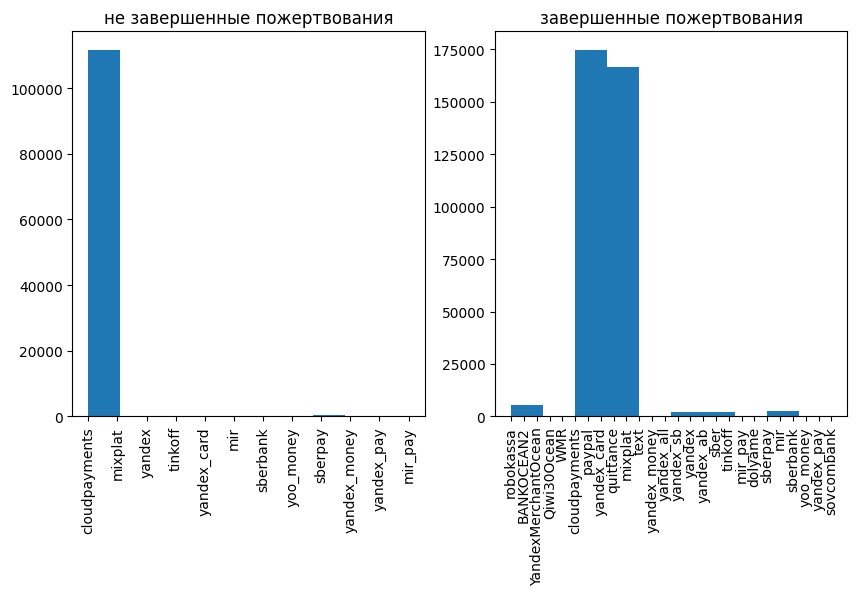

In [68]:
# оценим, с каким способами оплаты было больше завершенных пожертвований

temp0 = data[data.status!=3]
temp1 = data[data.status==3]

print(f'способы оплаты для незавершенных пожертвований\n{temp0["category"].value_counts().head(7)}\n')
print(f'способы оплаты для завершенных пожертвований\n{temp1["category"].value_counts().head(7)}')

print(f'\nплатежные системы для незавершенных пожертвований\n{temp0["gateway"].value_counts().head(7)}\n')
print(f'платежные системы для завершенных пожертвований\n{temp1["gateway"].value_counts().head(7)}')

import matplotlib.pyplot as plt

fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(10,5))

ax1.hist(temp0['category'])
ax1.set_title('не завершенные пожертвования')
ax1.tick_params(axis='x', rotation=90)  

ax2.hist(temp1['category'])
ax2.set_title('завершенные пожертвования')
ax2.tick_params(axis='x', rotation=90) 

plt.show()

In [69]:
# логично было бы объединить эти данные в один способ оплаты

# в платежных системах редко встречаются 
# dolyame, quittance, text, sovcombank

# в способах оплаты редко встречаются 
# Qiwi30Ocean, yandex_money, yandex_pay, yandex_all, dolyame, mir_pay, yoo_money, yandex_ab, WMR, text, quittance, sovcombank

In [70]:
# изменения платежных систем
# dolyame, quittance, text, sovcombank на other

In [71]:
# изменения способов оплаты
# dolyame, text, quittance, sovcombank на other
# WMR на robokassa
# mir_pay на mir
# yandex_all, yandex_ab, yoo_money на yandex
# Qiwi30Ocean, yandex_money, yandex_pay на соответствующую платежную систему
# yandex_sb, yandex_card на yandex

In [72]:
gateway_dict = {
    'other': ['dolyame', 'quittance', 'text', 'sovcombank'] 
}

category_dict = {
    'other': ['dolyame', 'quittance', 'text', 'sovcombank'],
    'robokassa': ['WMR'],    
    'mir': ['mir_pay'],
    'yandex': ['yandex_all', 'yandex_ab', 'yoo_money', 'yandex_sb', 'yandex_card'],
}


def replace_value(value, column):
    """
    value: str - текущее значение категории
    column: str - название колонки для выбора словаря
    return value: str - новое значение категории
    """
    if pd.isna(value): # пропуски заполняем значением 'none'
        return 'none'
    elif column  == 'gateway':
        for key, values in gateway_dict.items():
            if value in values:
                return key
    else:
        for key, values in category_dict.items():
            if value in values:
                return key
    return value  # возвращаем оригинальное значение, если не найдено соответствие
    
data['gateway'] = data['gateway'].agg(lambda x: replace_value(x,'gateway'))
data['category'] = data['category'].agg(lambda x: replace_value(x,'category'))

data.loc[data['category'] == 'yandex_money', 'category'] = data['gateway']
data.loc[data['category'] == 'yandex_pay', 'category'] = data['gateway']
data.loc[data['category'] == 'Qiwi30Ocean', 'category'] = data['gateway']

# заменим платежные системы mixplat,cloudpayments,robokassa,yandex на соответствующие типы оплаты для более подробной информации

for value in ['mixplat', 'cloudpayments', 'robokassa', 'yandex']:
    data.loc[data['gateway'] == value, 'gateway'] = data['category']  
    
# объединим значения сбербанка

data.loc[data['category'] == 'sber', 'category'] = 'sberbank'
data.loc[data['category'] == 'sberpay', 'category'] = 'sberbank'

data.loc[data['gateway'] == 'sber', 'gateway'] = 'sberbank'
data.loc[data['gateway'] == 'sberpay', 'gateway'] = 'sberbank'

In [73]:
# для лучшего анализа оценим по годам уникальные значения способов оплаты
# возможно более свежие данные заполняются проще или наоборот последнее время способ оплаты прописывается детальнее

data['year'] = data['when'].dt.year
temp = data.groupby('year')['category'].unique().reset_index()
for i in range(temp.shape[0]):
    print(f'\nактуальные способы оплаты на {temp.year[i]} год') 
    print(temp['category'][i])


актуальные способы оплаты на 2012 год
['robokassa' 'BANKOCEAN2' 'YandexMerchantOcean' 'cloudpayments']

актуальные способы оплаты на 2013 год
['cloudpayments' 'YandexMerchantOcean' 'robokassa' 'paypal']

актуальные способы оплаты на 2014 год
['cloudpayments' 'YandexMerchantOcean' 'paypal' 'robokassa']

актуальные способы оплаты на 2015 год
['cloudpayments' 'YandexMerchantOcean' 'robokassa' 'paypal']

актуальные способы оплаты на 2016 год
['cloudpayments' 'YandexMerchantOcean' 'paypal' 'robokassa' 'yandex'
 'other' 'mixplat']

актуальные способы оплаты на 2017 год
['cloudpayments' 'mixplat' 'robokassa' 'paypal' 'YandexMerchantOcean'
 'yandex' 'other' 'sberbank']

актуальные способы оплаты на 2018 год
['cloudpayments' 'mixplat' 'YandexMerchantOcean' 'yandex' 'paypal'
 'robokassa' 'sberbank']

актуальные способы оплаты на 2019 год
['cloudpayments' 'mixplat' 'sberbank' 'yandex' 'robokassa'
 'YandexMerchantOcean' 'paypal']

актуальные способы оплаты на 2020 год
['cloudpayments' 'mixplat' '

In [74]:
data['category'].value_counts()

category
mixplat                272701
cloudpayments          177686
yandex                   4162
sberbank                 3678
robokassa                2469
YandexMerchantOcean      1892
BANKOCEAN2               1547
paypal                   1202
tinkoff                  1082
mir                       469
other                      55
Name: count, dtype: int64

In [75]:
data['gateway'].value_counts()

gateway
mixplat                272701
cloudpayments          177686
yandex                   4162
sberbank                 3678
robokassa                2469
YandexMerchantOcean      1892
BANKOCEAN2               1547
paypal                   1202
tinkoff                  1082
mir                       469
other                      55
Name: count, dtype: int64

In [76]:
# финальная проверка значений 

for value in list(data['category'].value_counts().index):
    print(f'для способа оплаты {value} существуют следующие платежные системы')
    print(data[data['category']==value]['gateway'].unique())

для способа оплаты mixplat существуют следующие платежные системы
['mixplat']
для способа оплаты cloudpayments существуют следующие платежные системы
['cloudpayments']
для способа оплаты yandex существуют следующие платежные системы
['yandex']
для способа оплаты sberbank существуют следующие платежные системы
['sberbank']
для способа оплаты robokassa существуют следующие платежные системы
['robokassa']
для способа оплаты YandexMerchantOcean существуют следующие платежные системы
['YandexMerchantOcean']
для способа оплаты BANKOCEAN2 существуют следующие платежные системы
['BANKOCEAN2']
для способа оплаты paypal существуют следующие платежные системы
['paypal']
для способа оплаты tinkoff существуют следующие платежные системы
['tinkoff']
для способа оплаты mir существуют следующие платежные системы
['mir']
для способа оплаты other существуют следующие платежные системы
['other']


In [77]:
# посмотрим какое получилось распредление после обработки

temp0 = data[data.status!=3]
temp1 = data[data.status==3]

print(f'для незавершенных пожертвований\n{temp0["category"].value_counts().head(7)}\n')
print(f'для завершенных пожертвований\n{temp1["category"].value_counts().head(7)}')

для незавершенных пожертвований
category
mixplat          105979
cloudpayments      5760
sberbank            366
mir                 102
tinkoff              48
yandex               40
Name: count, dtype: int64

для завершенных пожертвований
category
cloudpayments          171926
mixplat                166722
yandex                   4122
sberbank                 3312
robokassa                2469
YandexMerchantOcean      1892
BANKOCEAN2               1547
Name: count, dtype: int64


In [78]:
# распредление напоминает первоначальное, значит все окей, данные не сломали 
# теперь можно удалить колонку category

data.drop('category', inplace=True, axis=1)
data.head(1)

,id,donor_id,transaction_id,recurring_id,status,when,amount_total,device_type,gateway,os,ipcountry,ipregion,sex,only_returned_donation,fund_id,year
0,60e72b5a985f702c62fef16ea95d403d,70a16408d291cbe843893174919a561a,79c76370621c03d9dee3cc57379ffa8d,NaN,3,2012-02-25 17:05:00,1000.0,None,robokassa,None,NaN,NaN,m,0,e3fd213a01aee164f475152137a83eec,2012


In [79]:
# найдем для каждого донора основной способ оплаты как самый частый

temp = data.groupby('donor_id')['gateway'].agg(lambda x: x.mode().iloc[0]).reset_index()
temp.head(3)

,donor_id,gateway
0,000085233064aac73f54ed9292e76613,cloudpayments
1,00008e5479b05b0cf84620b017a54f6e,mixplat
2,0000f19ad7b4da36765dacad76cdadc9,YandexMerchantOcean


In [80]:
# добавим в нашу таблицу эту фичу

donor_df = donor_df.merge(temp, how='left', left_on='id', right_on='donor_id')
donor_df.drop('donor_id', inplace=True, axis=1)
donor_df.head(2)

,id,sex,only_returned_donation,last_date,days_since_last,target,device_type,os,gateway
0,70a16408d291cbe843893174919a561a,m,0,2012-02-25 17:05:00,3414,1,None,None,robokassa
1,7c9bc4fb1bb133cef5a68710fff911d8,f,0,2014-12-19 22:29:00,2386,1,None,None,cloudpayments


In [81]:
# теперь перейдем к работе со странами и регионами, в них много пропущенных значений
# посмотрим можем ли мы восстановить пропущенные значения с помощью друг друга

print(f'количество неизвестных стран с известным регионом: {data[data["ipregion"].notnull()].isna().sum()["ipcountry"]}')
print(f'количество неизвестных регионов с известной страной: {data[data["ipcountry"].notnull()].isna().sum()["ipregion"]}')

количество неизвестных стран с известным регионом: 0
количество неизвестных регионов с известной страной: 26211


In [82]:
print(f'уникальные страны\n {data["ipcountry"].unique()}\n')

уникальные страны
 [nan 'RU' 'ES' 'GB' 'US' 'DE' 'UA' 'KR' 'FR' 'AE' 'AT' 'IL' 'LK' 'LT' 'NO'
 'IT' 'CH' 'EE' 'KZ' 'MT' 'CY' 'MD' 'TR' 'PL' 'SG' 'NL' 'LV' 'SE' 'BE'
 'BY' 'IE' 'HR' 'GR' 'PT' 'HU' 'CA' 'ME' 'CZ' 'DK' 'AM' 'FI' 'BG' 'MC'
 'VN' 'MU' 'SI' 'GE' 'TH' 'KN' 'AR' 'RO' 'IN' 'JP' 'EG' 'AU' 'OM' 'DO'
 'UY' 'NG' 'KG' 'CR' 'JO' 'ID' 'MK' 'IQ' 'UZ' 'CU' 'KY' 'TM' 'MX' 'DZ'
 'BR' 'AZ' 'LB' 'KH' 'MY' 'SC' 'ZA' 'NZ' 'MF' 'LU' 'AD' 'NP' 'RS' 'SA'
 'TW' 'QA' 'MV' 'SK' 'CN' 'IR' 'VG' 'EC' 'CL' 'IS' 'TJ' 'AL' 'CW' 'PK'
 'KW' 'Норвегия' 'Германия' 'Гонконг' 'США' 'Великобритания' 'Швеция'
 'Нидерланды' 'Латвия' 'JM' 'Турция' 'Финляндия' 'Болгария' 'КНР'
 'ндия Индия' 'Республика Корея' 'Испания' 'Украина' 'Армения' 'Франция'
 'Румыния' 'Таиланд' 'MA' 'VE' 'Словакия' 'Италия' 'Узбекистан'
 'Аргентина' 'Ирландия' 'Польша' 'Чехия' 'Казахстан' 'Австрия' 'BA'
 'Швейцария' 'Кипр' 'Сербия' 'ЮАР' 'Белоруссия' 'Грузия' 'Греция' 'Канада'
 'Бельгия' 'ОАЭ' 'Черногория' 'Мексика' 'Киргизия' 'Австралия' '

In [83]:
print(f'уникальные регионы\n {data["ipregion"].unique()}\n')

уникальные регионы
 [nan 'Москва' 'Московская область' 'Саратовская область'
 'Рязанская область' 'Санкт-Петербург' 'Республика Татарстан'
 'Республика Кабардино-Балкария' 'Ростовская область' 'Краснодарский край'
 'New York' 'Республика Адыгея' 'Новосибирская область'
 'Днепропетровская область' 'Пермский край' 'Самарская область'
 'Ульяновская область' 'Хмельницкая область' 'Омская область'
 'Волгоградская область' 'Тульская область' 'Калининградская область'
 'Мурманская область' 'Челябинская область' 'Красноярский край' 'Illinois'
 'Нижегородская область' 'Киев' 'Приморский край' 'Новгородская область'
 'Moscow' 'Республика Марий Эл' 'Ханты-Мансийский автономный округ'
 'Кировская область' 'Брянская область' 'Свердловская область'
 'Винницкая область' 'California' 'Республика Башкортостан' 'Michigan'
 'Владимирская область' 'Western Province' 'Иркутская область'
 'Ставропольский край' 'Кемеровская область' 'Вологодская область'
 'Воронежская область' 'Республика Саха (Якутия)' 'Кал

In [84]:
# заменим международные коды на понятные названия

words = ['ES', 'GB', 'US', 'DE', 'UA', 'KR', 'FR', 'AE', 'AT', 'IL', 'LK', 'LT', 'NO', 'IT', 'CH', 'EE', 'KZ', 'MT', 'CY', 'MD',
         'TR', 'PL', 'SG', 'NL', 'LV', 'SE', 'BE', 'BY', 'IE', 'HR', 'GR', 'PT', 'HU', 'CA', 'ME', 'CZ', 'DK', 'AM', 'FI', 'BG',
         'MC', 'VN', 'MU', 'SI', 'GE', 'TH', 'KN', 'AR', 'RO', 'IN', 'JP', 'EG', 'AU', 'OM', 'DO', 'UY', 'NG', 'KG', 'CR', 'JO',
         'ID', 'MK', 'IQ', 'UZ', 'CU', 'KY', 'TM', 'MX', 'DZ', 'BR', 'AZ', 'LB', 'KH', 'MY', 'SC', 'ZA', 'NZ', 'MF', 'LU', 'AD',
         'NP', 'RS', 'SA', 'TW', 'QA', 'MV', 'SK', 'CN', 'IR', 'VG', 'EC', 'CL', 'IS', 'TJ', 'AL', 'CW', 'PK', 'KW', 'MA', 'VE',
         'BD', 'JM', 'BA', 'MO', 'PR', 'HK']

for word in words:
    print(f'регионы для страны {word}\n {data.loc[data["ipcountry"]==word]["ipregion"].unique()}\n')

регионы для страны ES
 [nan 'Madrid' 'Barcelona' 'Alicante' 'Huelva' 'Girona' 'Pontevedra' 'Lugo'
 'Biscay' 'Santa Cruz de Tenerife' 'Tarragona' 'Valencia' 'Las Palmas'
 'Область Мадрид' 'Область Валенсия' 'Балеарские Острова' 'Каталония'
 'Андалусия' 'Галиция']

регионы для страны GB
 [nan 'England' 'Plymouth' 'Hampshire' 'Derbyshire' 'Warwickshire'
 'Hertfordshire' 'West Sussex' 'Sheffield' 'Nottingham' 'Bristol'
 'Birmingham' 'Stoke-on-Trent' 'Peterborough' 'Warrington' 'Milton Keynes'
 'Leicester' 'Leicestershire' 'Reading' 'Brighton and Hove' 'Slough'
 'Sunderland' 'Kent' 'Suffolk' 'Surrey' 'Staffordshire' 'Lisburn' 'Leeds'
 'Lincolnshire' 'Glasgow City' 'Cumbria' 'Dundee City' 'Большой Лондон'
 'Portsmouth' 'Southend-on-Sea' 'Бэллимани'
 'Бат и Северо-Восточный Сомерсет' 'Эссекс' 'Хэмпшир' 'Манчестер' 'Пул'
 'Хартфордшир' 'Глостершир' 'Кент' 'Ливерпуль' 'Восточный Сассекс' 'Девон'
 'Колдердейл' 'Рочдейл' 'Вулвергемптон']

регионы для страны US
 ['New York' 'Illinois' 'California'

регионы для страны RO
 ['Bucuresti' nan 'Judetul Salaj' 'Teleorman' 'Judetul Calarasi' 'Бухарест'
 'Констанца' 'Илфов' 'Дымбовица' 'Арджеш' 'Тулча']

регионы для страны IN
 ['Tamil Nadu' 'Maharashtra' nan 'National Capital Territory of Delhi'
 'Karnataka' 'Гоа' 'Махараштра' 'Карнатака']

регионы для страны JP
 [nan 'Tokyo' 'Токио']

регионы для страны EG
 [nan 'Alexandria' 'Каир' 'Дакахлия']

регионы для страны AU
 ['Victoria' nan 'South Australia' 'Queensland' 'New South Wales'
 'Новый Южный Уэльс' 'Виктория']

регионы для страны OM
 ['Muhafazat Masqat' nan 'Маскат']

регионы для страны DO
 ['Nacional' 'Сантьяго']

регионы для страны UY
 ['Departamento de Montevideo' 'Монтевидео']

регионы для страны NG
 ['Lagos' nan]

регионы для страны KG
 [nan 'Чуйская область']

регионы для страны CR
 ['Provincia de Guanacaste']

регионы для страны JO
 [nan]

регионы для страны ID
 ['Jakarta' nan 'Джакарта' 'Восточный Калимантан' 'Бали' 'Центральная Ява'
 'Западная Ява']

регионы для страны MK
 [n

In [85]:
words = {'RU': 'Россия', 'ES': 'Испания', 'GB': 'Великобритания', 'US': 'США', 'DE': 'Германия', 'UA': 'Украина', 'LK': 'США',
         'KR': 'Республика Корея', 'FR': 'Франция', 'AE': 'ОАЭ', 'AT': 'Австрия', 'IL': 'Израиль', 'LT': 'Литва', 'CY': 'Кипр',
         'NO': 'Норвегия', 'IT': 'Италия', 'CH': 'Швейцария', 'EE': 'Эстония', 'KZ': 'Казахстан', 'MT': 'Мальта', 'IN': 'Индия',
         'MD': 'Молдавия', 'TR': 'Турция', 'PL': 'Польша', 'SG': 'Сингапур', 'NL': 'Нидерланды', 'LV': 'Латвия', 'SE': 'Швеция',
         'BE': 'Бельгия', 'BY': 'Белоруссия', 'IE': 'Ирландия', 'HR': 'Хорватия', 'GR': 'Греция', 'AM': 'Армения', 'PR': 'США',
         'HU': 'Венгрия', 'CN': 'КНР', 'CA': 'Канада', 'ME': 'Черногория', 'CZ': 'Чехия', 'DK': 'Дания', 'PT': 'Португалия',
         'FI': 'Финляндия', 'BG': 'Болгария', 'VN': 'Вьетнам', 'MU': 'Маврикий', 'SI': 'Словения', 'GE': 'Грузия', 'IQ': 'Ирак',
         'TH': 'Таиланд', 'AR': 'Аргентина', 'RO': 'Румыния', 'JP': 'Япония', 'EG': 'Египет', 'AU': 'Австралия', 'OM': 'Оман', 
         'DO': 'Чили', 'CU': 'Куба', 'NG': 'Нигерия', 'MX': 'Мексика', 'CR': 'Коста-Рика', 'BA': 'Федерация Боснии и Герцеговины',
         'ID': 'Индонезия', 'VG': 'Великобритания', 'MK': 'Македония', 'MY': 'Малайзия', 'KG': 'Киргизия', 'LU': 'Люксембург',
         'BR': 'Бразилия', 'LB': 'Ливан', 'KH': 'Камбоджа', 'UZ': 'Узбекистан', 'SC': 'Канада', 'ZA': 'ЮАР', 'AZ': 'Азербайджан',
         'RS': 'Сербия', 'DZ': 'Африка', 'SA': 'Саудовская Аравия', 'TW': 'Китай', 'QA': 'Катар', 'MV': 'Мальдивы', 'IR': 'Иран',
         'EC': 'Эквадор', 'NZ': 'Новая Зеландия', 'TJ': 'Таджикистан', 'PK': 'Пакистан', 'VE': 'Венесуэла', 'BD': 'Бангладеш', 
         'JM': 'Ямайка', 'CL': 'Чили', 'KN': 'Сент-Китс и Невис',  'HK': 'Китай', 'MO': 'Китай', 'MF': 'Франция','AD': 'Андорра',
         'NP': 'Непал', 'SK': 'Словакия', 'IS': 'Исландия', 'AL': 'Албания', 'CW': 'Нидерланды', 'MC': 'Монако', 'UY': 'Уругвай',
         'KW': 'Кувейт', 'MA': 'Марокко', 'JO': 'Иордания', 'KY': 'Великобритания', 'TM': 'Туркменистан', 'ндия Индия': 'Индия',
         'Макао': 'Китай', 'Гонконг': 'Китай'}

data['ipcountry'].replace(words, inplace=True)

print(f'уникальные страны\n {data["ipcountry"].unique()}\n')

уникальные страны
 [nan 'Россия' 'Испания' 'Великобритания' 'США' 'Германия' 'Украина'
 'Республика Корея' 'Франция' 'ОАЭ' 'Австрия' 'Израиль' 'Литва' 'Норвегия'
 'Италия' 'Швейцария' 'Эстония' 'Казахстан' 'Мальта' 'Кипр' 'Молдавия'
 'Турция' 'Польша' 'Сингапур' 'Нидерланды' 'Латвия' 'Швеция' 'Бельгия'
 'Белоруссия' 'Ирландия' 'Хорватия' 'Греция' 'Португалия' 'Венгрия'
 'Канада' 'Черногория' 'Чехия' 'Дания' 'Армения' 'Финляндия' 'Болгария'
 'Монако' 'Вьетнам' 'Маврикий' 'Словения' 'Грузия' 'Таиланд'
 'Сент-Китс и Невис' 'Аргентина' 'Румыния' 'Индия' 'Япония' 'Египет'
 'Австралия' 'Оман' 'Чили' 'Уругвай' 'Нигерия' 'Киргизия' 'Коста-Рика'
 'Иордания' 'Индонезия' 'Македония' 'Ирак' 'Узбекистан' 'Куба'
 'Туркменистан' 'Мексика' 'Африка' 'Бразилия' 'Азербайджан' 'Ливан'
 'Камбоджа' 'Малайзия' 'ЮАР' 'Новая Зеландия' 'Люксембург' 'Андорра'
 'Непал' 'Сербия' 'Саудовская Аравия' 'Китай' 'Катар' 'Мальдивы'
 'Словакия' 'КНР' 'Иран' 'Эквадор' 'Исландия' 'Таджикистан' 'Албания'
 'Пакистан' 'Кувейт'

In [86]:
# теперь пропущенные регионы заменим страной

data['ipregion'].fillna(data['ipcountry'], inplace=True)

print(f'количество неизвестных стран с известным регионом: {data[data["ipregion"].notnull()].isna().sum()["ipcountry"]}')
print(f'количество неизвестных регионов с известной страной: {data[data["ipcountry"].notnull()].isna().sum()["ipregion"]}')

количество неизвестных стран с известным регионом: 0
количество неизвестных регионов с известной страной: 0


In [87]:
data.isna().sum()

id                             0
donor_id                       0
transaction_id                 0
recurring_id              108009
status                         0
when                           0
amount_total                   0
device_type               440905
gateway                        0
os                        440905
ipcountry                 117791
ipregion                  117791
sex                       307490
only_returned_donation         0
fund_id                       91
year                           0
dtype: int64

In [88]:
# восстановим оставшиеся пропуски в регионах/странах, заполнив их самым частым регионом/страной текущего донора

# получим нужные значения
temp_country = data.groupby('donor_id')['ipcountry'].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else None).reset_index()
temp_country.rename(columns={'ipcountry': 'country'}, inplace=True)

temp_region = data.groupby('donor_id')['ipregion'].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else None).reset_index()
temp_region.rename(columns={'ipregion': 'region'}, inplace=True)

# перейдем к заполнению
data = data.merge(temp_country, how='left', on='donor_id')
data['ipcountry'].fillna(data['country'], inplace=True)

data = data.merge(temp_region, how='left', on='donor_id')
data['ipregion'].fillna(data['region'], inplace=True)

data.drop(['country', 'region'], inplace=True, axis=1)

# проверим на дубликаты и оценим сколько осталось пропущенных значений 
print(data["id"].duplicated().sum())
data.isna().sum()

0


id                             0
donor_id                       0
transaction_id                 0
recurring_id              108009
status                         0
when                           0
amount_total                   0
device_type               440905
gateway                        0
os                        440905
ipcountry                  19434
ipregion                   19434
sex                       307490
only_returned_donation         0
fund_id                       91
year                           0
dtype: int64

In [89]:
data['ipcountry'].fillna('Неизвестно', inplace=True)
data['ipregion'].fillna('Неизвестно', inplace=True)

In [90]:
# посмотрим, в каких странах больше завершенных пожертвований

temp0 = data[data.status!=3]
temp1 = data[data.status==3]

print(f'основные страны незавершенных пожертвований\n{temp0["ipcountry"].value_counts().head(3)}\n')
print(f'основные страны завершенных пожертвований\n{temp1["ipcountry"].value_counts().head()}')

основные страны незавершенных пожертвований
ipcountry
Россия        110603
Неизвестно       568
США              161
Name: count, dtype: int64

основные страны завершенных пожертвований
ipcountry
Россия        318215
Неизвестно     18866
США             2424
Германия        2379
Франция         2104
Name: count, dtype: int64


In [91]:
# оценим, как часто у одного донора были транзакции из разных стран

def get_true_country_mode(value):
    if 'Неизвестно' in value:
        value.remove('Неизвестно')
        return ['Неизвестно'] if not value else value
    else:
        return value
        
        
temp = data.groupby('donor_id')['ipcountry'].agg(lambda x: get_true_country_mode(x.mode().tolist())).reset_index()
temp.ipcountry.value_counts().head(10)

ipcountry
[Россия]            190809
[Неизвестно]         11721
[США]                  738
[Германия]             610
[Франция]              405
[Нидерланды]           364
[Великобритания]       333
[Украина]              216
[Белоруссия]           171
[Финляндия]            120
Name: count, dtype: int64

In [92]:
# поставим донорам, у которых часто транзакции не только из одной страны специальную метку

def get_multiple(value):
    if len(value)>1:
        return 1
    return 0


temp['multiple_country'] = temp['ipcountry'].apply(get_multiple)
temp

,donor_id,ipcountry,multiple_country
0,000085233064aac73f54ed9292e76613,[Россия],0
1,00008e5479b05b0cf84620b017a54f6e,[Россия],0
2,0000f19ad7b4da36765dacad76cdadc9,[Россия],0
3,0000f6c6b8f0a8c8cdbcaa2330ea7f64,[Россия],0
4,0001969a913d9ada268d363b54afa383,[Россия],0
...,...,...,...
207825,fffeb1bf939cf19731a442e92f9a2175,[Россия],0
207826,ffff00cee9be3d4d584f3100637ece51,[Россия],0
207827,ffff1ffe8ffa1f3a880892e145be49ec,[Россия],0
207828,ffff964599367cf1498f1e19aa3b0337,[Россия],0


In [93]:
# поставим донорам, у которых часто была транзакция из России специальную метку

def get_russia(value):
    if 'Россия' in value:
        return 1
    return 0


temp['russia'] = temp['ipcountry'].apply(get_russia)
temp

,donor_id,ipcountry,multiple_country,russia
0,000085233064aac73f54ed9292e76613,[Россия],0,1
1,00008e5479b05b0cf84620b017a54f6e,[Россия],0,1
2,0000f19ad7b4da36765dacad76cdadc9,[Россия],0,1
3,0000f6c6b8f0a8c8cdbcaa2330ea7f64,[Россия],0,1
4,0001969a913d9ada268d363b54afa383,[Россия],0,1
...,...,...,...,...
207825,fffeb1bf939cf19731a442e92f9a2175,[Россия],0,1
207826,ffff00cee9be3d4d584f3100637ece51,[Россия],0,1
207827,ffff1ffe8ffa1f3a880892e145be49ec,[Россия],0,1
207828,ffff964599367cf1498f1e19aa3b0337,[Россия],0,1


In [94]:
# проверим все ли верно 

temp[temp.multiple_country==1].head()

,donor_id,ipcountry,multiple_country,russia
368,0070edebbba4542670916eab24d0beb1,"[Россия, США]",1,1
1070,013b941fa727773dc62f3b757744a1b0,"[Россия, Эстония]",1,1
1252,016d01e3b4671702973c350d628b7b3b,"[Германия, Россия]",1,1
1727,01f202e950d76be1c8a052320cfeca13,"[Италия, Франция]",1,0
2557,030befda3225f02b777c7c3114c43142,"[Россия, Франция]",1,1


In [95]:
# добавим в нашу таблицу все созданные фичи

donor_df = donor_df.merge(temp, how='left', left_on='id', right_on='donor_id')
donor_df.drop('donor_id', axis=1, inplace=True)
donor_df.head(2)

,id,sex,only_returned_donation,last_date,days_since_last,target,device_type,os,gateway,ipcountry,multiple_country,russia
0,70a16408d291cbe843893174919a561a,m,0,2012-02-25 17:05:00,3414,1,None,None,robokassa,[Неизвестно],0,0
1,7c9bc4fb1bb133cef5a68710fff911d8,f,0,2014-12-19 22:29:00,2386,1,None,None,cloudpayments,[Россия],0,1


In [96]:
# перезапишем признак 'ipcountry', так как в нем сейчас находятся несколько значений

# возьмем страну как самую частую

donor_df.drop(['ipcountry'], inplace=True, axis=1)

temp = data.groupby('donor_id')['ipcountry'].agg(lambda x: x.mode().iloc[0]).reset_index()
donor_df = donor_df.merge(temp, how='left', left_on='id', right_on='donor_id')
donor_df.drop('donor_id', axis=1, inplace=True)
donor_df.head()

,id,sex,only_returned_donation,last_date,days_since_last,target,device_type,os,gateway,multiple_country,russia,ipcountry
0,70a16408d291cbe843893174919a561a,m,0,2012-02-25 17:05:00,3414,1,None,None,robokassa,0,0,Неизвестно
1,7c9bc4fb1bb133cef5a68710fff911d8,f,0,2014-12-19 22:29:00,2386,1,None,None,cloudpayments,0,1,Россия
2,6281148700f119139418212037fe85aa,m,0,2019-05-12 17:40:00,781,1,None,None,cloudpayments,0,1,Россия
3,faee8f97a290186dcb6a4c798550637f,m,0,2012-03-01 13:56:00,3409,1,None,None,BANKOCEAN2,0,0,Неизвестно
4,406d9953fd5ed6c1ca968d867b68b1af,f,0,2012-03-01 19:06:00,3409,1,None,None,BANKOCEAN2,0,0,Неизвестно


In [97]:
# регион также возьмем как самый частый

temp = data.groupby('donor_id')['ipregion'].agg(lambda x: x.mode().iloc[0]).reset_index()
donor_df = donor_df.merge(temp, how='left', left_on='id', right_on='donor_id')
donor_df.drop('donor_id', axis=1, inplace=True)
donor_df.head()

,id,sex,only_returned_donation,last_date,days_since_last,target,device_type,os,gateway,multiple_country,russia,ipcountry,ipregion
0,70a16408d291cbe843893174919a561a,m,0,2012-02-25 17:05:00,3414,1,None,None,robokassa,0,0,Неизвестно,Неизвестно
1,7c9bc4fb1bb133cef5a68710fff911d8,f,0,2014-12-19 22:29:00,2386,1,None,None,cloudpayments,0,1,Россия,Калининградская область
2,6281148700f119139418212037fe85aa,m,0,2019-05-12 17:40:00,781,1,None,None,cloudpayments,0,1,Россия,Москва
3,faee8f97a290186dcb6a4c798550637f,m,0,2012-03-01 13:56:00,3409,1,None,None,BANKOCEAN2,0,0,Неизвестно,Неизвестно
4,406d9953fd5ed6c1ca968d867b68b1af,f,0,2012-03-01 19:06:00,3409,1,None,None,BANKOCEAN2,0,0,Неизвестно,Неизвестно


In [98]:
# повторно оценим распределение до преобразования

temp0 = data[data.status!=3]
temp1 = data[data.status==3]

print(f'основные страны незавершенных пожертвований\n{temp0["ipcountry"].value_counts().head(3)}\n')
print(f'основные страны завершенных пожертвований\n{temp1["ipcountry"].value_counts().head()}')

основные страны незавершенных пожертвований
ipcountry
Россия        110603
Неизвестно       568
США              161
Name: count, dtype: int64

основные страны завершенных пожертвований
ipcountry
Россия        318215
Неизвестно     18866
США             2424
Германия        2379
Франция         2104
Name: count, dtype: int64


In [99]:
# редкие страны можно объединить в группы 

temp = data['ipcountry'].value_counts().reset_index()
print(temp.head(15))
temp[temp['count']<=500]['ipcountry'].unique()

         ipcountry   count
0           Россия  428818
1       Неизвестно   19434
2              США    2585
3         Германия    2494
4          Франция    2190
5   Великобритания    1212
6       Нидерланды    1145
7           Италия     687
8          Испания     526
9          Украина     474
10          Латвия     388
11       Финляндия     377
12          Турция     369
13      Белоруссия     353
14          Греция     323


array(['Украина', 'Латвия', 'Финляндия', 'Турция', 'Белоруссия', 'Греция',
       'Израиль', 'Швеция', 'Румыния', 'Казахстан', 'Индия', 'Армения',
       'Грузия', 'ОАЭ', 'Чехия', 'Кипр', 'Швейцария', 'Эстония',
       'Норвегия', 'Австрия', 'Сербия', 'Канада', 'Черногория', 'Польша',
       'Португалия', 'Ирландия', 'Таиланд', 'Бельгия', 'Болгария',
       'Индонезия', 'Литва', 'Дания', 'Киргизия', 'Сингапур', 'Египет',
       'Австралия', 'Иран', 'Венгрия', 'Узбекистан', 'Мексика',
       'Республика Корея', 'Македония', 'Эквадор', 'Албания', 'Мальдивы',
       'Молдавия', 'Аргентина', 'Иордания', 'Азербайджан', 'Бразилия',
       'Япония', 'Хорватия', 'КНР', 'Вьетнам', 'Мальта', 'Таджикистан',
       'Люксембург', 'Камбоджа', 'Китай', 'Словения', 'Саудовская Аравия',
       'Бангладеш', 'Куба', 'Монако', 'Словакия', 'Катар', 'Нигерия',
       'Ливан', 'Маврикий', 'Чили', 'ЮАР', 'Оман', 'Малайзия', 'Африка',
       'Уругвай', 'Новая Зеландия', 'Кувейт', 'Танзания', 'Афганистан',
    

In [100]:
# возьмем из этого списка редкие страны, встречающиеся менее 500 раз и объединим в группы

country_dict = {'Европа': ['Эстония', 'Швейцария', 'Латвия', 'Монако', 'Швеция', 'Финляндия',
                           'Чехия', 'Греция', 'Румыния', 'Норвегия', 'Австрия', 'Кипр', 'Сербия', 'Люксембург', 
                           'Бельгия', 'Португалия', 'Черногория', 'Венгрия', 'Ирландия', 'Литва', 'Дания', 'Хорватия',
                           'Польша', 'Словения', 'Мальта', 'Албания', 'Македония', 'Исландия', 'Болгария', 'Словакия', 
                           'Андорра', 'Федерация Боснии и Герцеговины', 'Новая Зеландия', 'Австралия'],
                'Азия': ['Турция', 'Израиль', 'Бангладеш', 'Грузия', 'Индия', 'Таиланд', 'Сингапур', 'Египет', 'Оман',
                         'Республика Корея', 'Камбоджа', 'Малайзия', 'Иран', 'Иордания', 'Катар', 'Саудовская Аравия', 
                         'Афганистан', 'ОАЭ', 'Ирак', 'Индонезия', 'Япония', 'Мальдивы', 'КНР', 'Вьетнам', 'Ливан', 
                         'Непал', 'Пакистан', 'Кувейт', 'Китай'],
                'Америка': ['Канада', 'Аргентина', 'Бразилия', 'Мексика', 'Ямайка', 'Чили', 'Эквадор', 'Уругвай', 
                            'Венесуэла', 'Куба', 'Коста-Рика', 'Сент-Китс и Невис'],
                'Африка': ['Нигерия', 'Маврикий', 'Гана', 'Танзания', 'ЮАР', 'Марокко'],             
                'СНГ': ['Украина', 'Белоруссия', 'Казахстан', 'Армения', 'Узбекистан', 'Киргизия', 
                        'Азербайджан', 'Молдавия', 'Таджикистан', 'Туркменистан']}

def replace_country(value):
    """
    value: str - текущее значение категории
    return value: str - новое значение категории
    """
    if pd.isna(value): # пропуски заполняем значением 'Неизвестно'
        return 'Неизвестно'
    for key, values in country_dict.items():
        if value in values:
            return key
    return value  # возвращаем оригинальное значение, если не найдено соответствие

data['ipcountry'] = data['ipcountry'].apply(replace_country)
data['ipcountry'].value_counts().reset_index()

,ipcountry,count
0,Россия,428818
1,Неизвестно,19434
2,Европа,4124
3,США,2585
4,Германия,2494
5,Франция,2190
6,Азия,1950
7,СНГ,1487
8,Великобритания,1212
9,Нидерланды,1145


In [101]:
# добавим Африку к категории Неизвестно, так как очень мало значений
# Америка тоже встречается мало, можно объединить ее с США

data['ipcountry'].replace({'Африка': 'Неизвестно'}, inplace=True)
data['ipcountry'].replace({'Америка': 'США'}, inplace=True)

In [102]:
# оценим распределение после преобразования

temp0 = data[data.status!=3]
temp1 = data[data.status==3]

print(f'основные страны незавершенных пожертвований\n{temp0["ipcountry"].value_counts().head(3)}\n')
print(f'основные страны завершенных пожертвований\n{temp1["ipcountry"].value_counts().head()}')

основные страны незавершенных пожертвований
ipcountry
Россия        110603
Неизвестно       568
Европа           280
Name: count, dtype: int64

основные страны завершенных пожертвований
ipcountry
Россия        318215
Неизвестно     18880
Европа          3844
США             2684
Германия        2379
Name: count, dtype: int64


In [103]:
# очевидно, что регионы России представлены в большом количестве и их логично оставить 
# оценим остальные регионы других стран 

tempnoRU = data[data.ipcountry!='Россия']

print('завершенные пожертвования не в России по регионам\n')
print(f'{tempnoRU[tempnoRU.status==3]["ipregion"].value_counts().reset_index().head(10)}\n')
print('незавершенные пожертвования не в России по регионам\n')
print(tempnoRU[tempnoRU.status!=3]["ipregion"].value_counts().reset_index().head(10))

завершенные пожертвования не в России по регионам

             ipregion  count
0          Неизвестно  18866
1                 США    907
2            Германия    858
3               North    750
4             Франция    669
5      Великобритания    570
6              Гессен    477
7          Нидерланды    305
8  Северная Голландия    299
9             Испания    280

незавершенные пожертвования не в России по регионам

             ipregion  count
0          Неизвестно    568
1                 США    106
2  Северная Голландия     72
3            Германия     47
4             Франция     36
5      Великобритания     32
6             Румыния     32
7             Украина     31
8          Белоруссия     28
9              Латвия     27


In [104]:
# проверим какой стране принадлежит регион North

data[data['ipregion']=='North']['ipcountry'].value_counts()

ipcountry
Франция    750
Name: count, dtype: int64

In [105]:
# можно сделать вывод, что в основном регион дублирует страну донора, если это не Россия 
# значит все регионы не в России можно отнести к одной группе
# пока что оставим как есть, далее рассмотрим следующие варианты

# 1. вариант
# объединить значения стран и регионов в признак location, заполнив его следующим образом
# если страна Россия, то location будет равен региону
# если страна не Россия, то location будет равен стране

# 2. вариант
# использовать только страну как есть

# 3. вариант
# в колонке страна оставить значения как есть
# в колонке регионы значения не российских регонов объединить в одну группу

# все варианты попробуем во время обучения модели

In [106]:
# аналогично для доноров объединим редкие страны в группы

countries = temp[temp['count']<=300]['ipcountry'].unique()
countries

array(['Швеция', 'Румыния', 'Казахстан', 'Индия', 'Армения', 'Грузия',
       'ОАЭ', 'Чехия', 'Кипр', 'Швейцария', 'Эстония', 'Норвегия',
       'Австрия', 'Сербия', 'Канада', 'Черногория', 'Польша',
       'Португалия', 'Ирландия', 'Таиланд', 'Бельгия', 'Болгария',
       'Индонезия', 'Литва', 'Дания', 'Киргизия', 'Сингапур', 'Египет',
       'Австралия', 'Иран', 'Венгрия', 'Узбекистан', 'Мексика',
       'Республика Корея', 'Македония', 'Эквадор', 'Албания', 'Мальдивы',
       'Молдавия', 'Аргентина', 'Иордания', 'Азербайджан', 'Бразилия',
       'Япония', 'Хорватия', 'КНР', 'Вьетнам', 'Мальта', 'Таджикистан',
       'Люксембург', 'Камбоджа', 'Китай', 'Словения', 'Саудовская Аравия',
       'Бангладеш', 'Куба', 'Монако', 'Словакия', 'Катар', 'Нигерия',
       'Ливан', 'Маврикий', 'Чили', 'ЮАР', 'Оман', 'Малайзия', 'Африка',
       'Уругвай', 'Новая Зеландия', 'Кувейт', 'Танзания', 'Афганистан',
       'Федерация Боснии и Герцеговины', 'Венесуэла', 'Марокко', 'Ямайка',
       'Исланди

In [107]:
country_dict = {'Европа': ['Эстония', 'Швейцария', 'Латвия', 'Монако', 'Швеция', 'Федерация Боснии и Герцеговины',
                           'Чехия', 'Греция', 'Румыния', 'Норвегия', 'Австрия', 'Кипр', 'Сербия', 'Люксембург', 
                           'Бельгия', 'Португалия', 'Черногория', 'Венгрия', 'Ирландия', 'Литва', 'Дания', 'Хорватия',
                           'Польша', 'Словения', 'Мальта', 'Албания', 'Македония', 'Исландия', 'Болгария', 'Словакия', 
                           'Андорра', 'Новая Зеландия', 'Австралия', 'Италия', 'Испания', 'Финляндия'],
                'Азия': ['Турция', 'Израиль', 'Бангладеш', 'Грузия', 'Индия', 'Таиланд', 'Сингапур', 'Египет', 'Оман',
                         'Республика Корея', 'Камбоджа', 'Малайзия', 'Иран', 'Иордания', 'Катар', 'Саудовская Аравия', 
                         'Афганистан', 'ОАЭ', 'Ирак', 'Индонезия', 'Япония', 'Мальдивы', 'КНР', 'Вьетнам', 'Ливан', 
                         'Непал', 'Пакистан', 'Кувейт', 'Китай'],
                'США': ['Канада', 'Аргентина', 'Бразилия', 'Мексика', 'Ямайка', 'Чили', 'Эквадор', 'Уругвай', 'Америка',
                            'Венесуэла', 'Куба', 'Коста-Рика', 'Сент-Китс и Невис'],
                'Неизвестно': ['Африка', 'Нигерия', 'Маврикий', 'Гана', 'Танзания', 'ЮАР', 'Марокко'],             
                'СНГ': ['Украина', 'Белоруссия', 'Казахстан', 'Армения', 'Узбекистан', 'Киргизия', 
                        'Азербайджан', 'Молдавия', 'Таджикистан', 'Туркменистан']}

def replace_country(value):
    """
    value: str - текущее значение категории
    return value: str - новое значение категории
    """
    for key, values in country_dict.items():
        if value in values:
            return key
    return value  # возвращаем оригинальное значение, если не найдено соответствие

donor_df['ipcountry'] = donor_df['ipcountry'].apply(replace_country)
donor_df['ipcountry'].value_counts().reset_index()

,ipcountry,count
0,Россия,151836
1,Неизвестно,11627
2,Европа,1205
3,США,805
4,Германия,631
5,СНГ,606
6,Азия,550
7,Франция,394
8,Нидерланды,373
9,Великобритания,353


In [108]:
# закончим с заполнением пропусков
print(donor_df.shape)
donor_df.isna().sum()

(168380, 13)


id                             0
sex                       120399
only_returned_donation         0
last_date                      0
days_since_last                0
target                         0
device_type               157878
os                        157878
gateway                        0
multiple_country               0
russia                         0
ipcountry                      0
ipregion                       0
dtype: int64

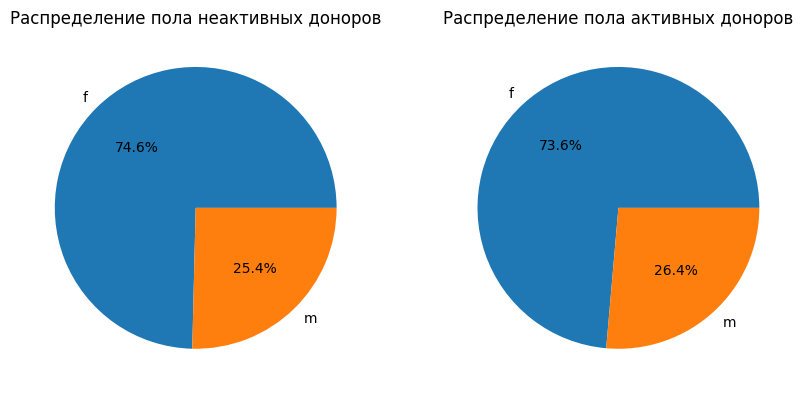

In [109]:
# посморим, как пол донора влияет на то активный он или нет 
# то есть оценим кто жертвует чаще 
# возможно пол никак не влияет и его проще удалить

temp = donor_df[donor_df.sex.notnull()]
temp0 = temp[temp.target==0]
temp1 = temp[temp.target==1]

inactive_counts = temp0.sex.value_counts()
active_counts = temp1.sex.value_counts()

import matplotlib.pyplot as plt 

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))


ax1.pie(inactive_counts, labels=inactive_counts.index, autopct='%1.1F%%')
ax1.set_title("Распределение пола неактивных доноров")

ax2.pie(active_counts, labels=inactive_counts.index, autopct='%1.1F%%')
ax2.set_title("Распределение пола активных доноров")

plt.show()

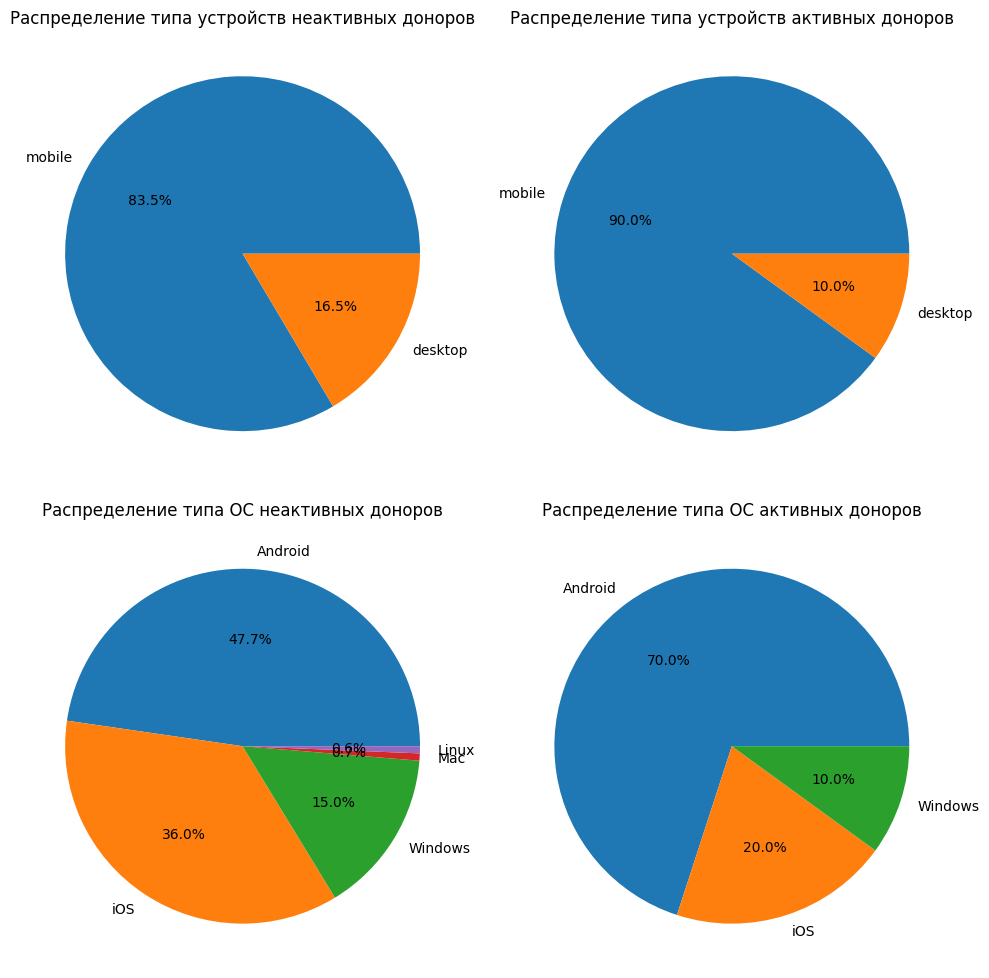

In [110]:
# device_type и os имеют также большое количество пропусков, аналогично оценим распределение

temp = donor_df[donor_df.device_type.notnull()]
temp0 = temp[temp.target==0]
temp1 = temp[temp.target==1]

inactive_counts = temp0.device_type.value_counts()
active_counts = temp1.device_type.value_counts()

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(10,10))

ax1.pie(inactive_counts, labels=inactive_counts.index, autopct='%1.1F%%')
ax1.set_title("Распределение типа устройств неактивных доноров")

ax2.pie(active_counts, labels=active_counts.index, autopct='%1.1F%%')
ax2.set_title("Распределение типа устройств активных доноров")

inactive_counts = temp0.os.value_counts()
active_counts = temp1.os.value_counts()

ax3.pie(inactive_counts, labels=inactive_counts.index, autopct='%1.1F%%')
ax3.set_title("Распределение типа OC неактивных доноров")

ax4.pie(active_counts, labels=active_counts.index, autopct='%1.1F%%')
ax4.set_title("Распределение типа OC активных доноров")

plt.tight_layout()
plt.show()

In [111]:
# видно что данные признаки одинако часто встречаются и у активных доноров и у неактивных доноров
# то есть никакой отличительной особенности нет, значит можно удалить

donor_df.drop(['sex', 'os', 'device_type'], axis=1, inplace=True)

In [112]:
# перейдем к генерации различных фичей, которые могут быть полезны для разных задач
# создадим признак наличия recurring_id у донора

ids_with_rec = data[data['recurring_id'].notnull()]['donor_id'].unique()
print(f'{len(ids_with_rec)} доноров имеют автоплатеж')
donor_df['recurring'] = donor_df['id'].isin(ids_with_rec).astype('int')

153206 доноров имеют автоплатеж


In [113]:
# подсчитаем для доноров общую сумму всех пожертвований

temp = data[data.status==3].groupby('donor_id')['amount_total'].sum().reset_index()
donor_df = donor_df.merge(temp, how='left', left_on='id', right_on='donor_id')
donor_df.drop('donor_id', inplace=True, axis=1)
donor_df['amount_total'].fillna(0, inplace=True)
donor_df.head(2)

,id,only_returned_donation,last_date,days_since_last,target,gateway,multiple_country,russia,ipcountry,ipregion,recurring,amount_total
0,70a16408d291cbe843893174919a561a,0,2012-02-25 17:05:00,3414,1,robokassa,0,0,Неизвестно,Неизвестно,0,1000.0
1,7c9bc4fb1bb133cef5a68710fff911d8,0,2014-12-19 22:29:00,2386,1,cloudpayments,0,1,Россия,Калининградская область,0,600.0


In [114]:
# подсчитаем для доноров среднюю сумму пожертвования

temp = data[data.status==3].groupby('donor_id')['amount_total'].mean().reset_index()
temp.rename(columns={'amount_total': 'amount_mean'}, inplace=True)
donor_df = donor_df.merge(temp, how='left', left_on='id', right_on='donor_id')
donor_df.drop('donor_id', inplace=True, axis=1)
donor_df['amount_mean'].fillna(0, inplace=True)
donor_df.head(2)

,id,only_returned_donation,last_date,days_since_last,target,gateway,multiple_country,russia,ipcountry,ipregion,recurring,amount_total,amount_mean
0,70a16408d291cbe843893174919a561a,0,2012-02-25 17:05:00,3414,1,robokassa,0,0,Неизвестно,Неизвестно,0,1000.0,1000.0
1,7c9bc4fb1bb133cef5a68710fff911d8,0,2014-12-19 22:29:00,2386,1,cloudpayments,0,1,Россия,Калининградская область,0,600.0,300.0


In [115]:
# подсчитаем для каждого донора количество пожертвований

temp = data[data.status==3].groupby('donor_id')['status'].value_counts().reset_index()
temp.rename(columns={'count': 'count_of_3_status'}, inplace=True)
donor_df = donor_df.merge(temp, how='left', left_on='id', right_on='donor_id')
donor_df.drop(['donor_id', 'status'], inplace=True, axis=1)
donor_df['count_of_3_status'].fillna(0, inplace=True)
donor_df.head(2)

,id,only_returned_donation,last_date,days_since_last,target,gateway,multiple_country,russia,ipcountry,ipregion,recurring,amount_total,amount_mean,count_of_3_status
0,70a16408d291cbe843893174919a561a,0,2012-02-25 17:05:00,3414,1,robokassa,0,0,Неизвестно,Неизвестно,0,1000.0,1000.0,1
1,7c9bc4fb1bb133cef5a68710fff911d8,0,2014-12-19 22:29:00,2386,1,cloudpayments,0,1,Россия,Калининградская область,0,600.0,300.0,2


In [116]:
# подсчитаем для каждого донора количество возвратов

temp = data[data.status==4].groupby('donor_id')['status'].value_counts().reset_index()
temp.rename(columns={'count': 'count_of_4_status'}, inplace=True)
donor_df = donor_df.merge(temp, how='left', left_on='id', right_on='donor_id')
donor_df.drop(['donor_id', 'status'], inplace=True, axis=1)
donor_df['count_of_4_status'].fillna(0, inplace=True)
donor_df.head(2)

,id,only_returned_donation,last_date,days_since_last,target,gateway,multiple_country,russia,ipcountry,ipregion,recurring,amount_total,amount_mean,count_of_3_status,count_of_4_status
0,70a16408d291cbe843893174919a561a,0,2012-02-25 17:05:00,3414,1,robokassa,0,0,Неизвестно,Неизвестно,0,1000.0,1000.0,1,0.0
1,7c9bc4fb1bb133cef5a68710fff911d8,0,2014-12-19 22:29:00,2386,1,cloudpayments,0,1,Россия,Калининградская область,0,600.0,300.0,2,0.0


In [117]:
# подсчитаем для каждого донора количество транзакций в статусе отклонен

temp = data[data.status==5].groupby('donor_id')['status'].value_counts().reset_index()
temp.rename(columns={'count': 'count_of_5_status'}, inplace=True)
donor_df = donor_df.merge(temp, how='left', left_on='id', right_on='donor_id')
donor_df.drop(['donor_id', 'status'], inplace=True, axis=1)
donor_df['count_of_5_status'].fillna(0, inplace=True)
donor_df.head(2)

,id,only_returned_donation,last_date,days_since_last,target,gateway,multiple_country,russia,ipcountry,ipregion,recurring,amount_total,amount_mean,count_of_3_status,count_of_4_status,count_of_5_status
0,70a16408d291cbe843893174919a561a,0,2012-02-25 17:05:00,3414,1,robokassa,0,0,Неизвестно,Неизвестно,0,1000.0,1000.0,1,0.0,0.0
1,7c9bc4fb1bb133cef5a68710fff911d8,0,2014-12-19 22:29:00,2386,1,cloudpayments,0,1,Россия,Калининградская область,0,600.0,300.0,2,0.0,0.0


In [118]:
temp = data.groupby(['donor_id', 'recurring_id'])['when'].agg(['min', 'max']).reset_index()
temp

,donor_id,recurring_id,min,max
0,00008e5479b05b0cf84620b017a54f6e,d41d8cd98f00b204e9800998ecf8427e,2020-05-04 08:40:14,2020-05-04 08:40:14
1,0000f6c6b8f0a8c8cdbcaa2330ea7f64,007753c6eb835ab1fbf66a8567407b4c,2019-06-02 11:38:00,2021-06-02 11:40:33
2,0000f6c6b8f0a8c8cdbcaa2330ea7f64,72bbc9cf743cc56dd422c0d7ba431f5c,2018-12-23 09:44:00,2019-02-23 09:44:00
3,0001969a913d9ada268d363b54afa383,d41d8cd98f00b204e9800998ecf8427e,2019-12-10 11:31:01,2019-12-10 11:31:01
4,0002145f1ac03b71cab739c5a369de94,d41d8cd98f00b204e9800998ecf8427e,2020-03-04 16:41:36,2020-03-04 16:42:15
...,...,...,...,...
156735,fffe4b8e50a941e677ec80535eaba4f9,d41d8cd98f00b204e9800998ecf8427e,2020-03-04 11:40:25,2020-03-04 11:40:25
156736,fffeb1bf939cf19731a442e92f9a2175,69f7c24f788a75079c7ff0243f80658c,2018-12-20 08:43:00,2020-08-20 08:43:00
156737,ffff00cee9be3d4d584f3100637ece51,d41d8cd98f00b204e9800998ecf8427e,2021-03-23 11:53:56,2021-03-23 11:53:56
156738,ffff1ffe8ffa1f3a880892e145be49ec,d41d8cd98f00b204e9800998ecf8427e,2021-02-25 16:47:39,2021-02-25 16:47:39


In [119]:
# оценим как долго донор использует автоплатеж (разница между первой и последней транзакцией с recurring_id)
# затем добавим этот признак в таблицу доноров

temp = data.groupby(['donor_id', 'recurring_id'])['when'].agg(['min', 'max']).reset_index()
temp['days_with_recurring'] = (temp['max'] - temp['min']).dt.days
temp.drop(['recurring_id', 'min', 'max'], axis=1, inplace=True)
donor_df = donor_df.merge(temp, how='left', left_on='id', right_on='donor_id')
donor_df.drop('donor_id', inplace=True, axis=1)
donor_df['days_with_recurring'].fillna(0, inplace=True)
donor_df.head(2)

,id,only_returned_donation,last_date,days_since_last,target,gateway,multiple_country,russia,ipcountry,ipregion,recurring,amount_total,amount_mean,count_of_3_status,count_of_4_status,count_of_5_status,days_with_recurring
0,70a16408d291cbe843893174919a561a,0,2012-02-25 17:05:00,3414,1,robokassa,0,0,Неизвестно,Неизвестно,0,1000.0,1000.0,1,0.0,0.0,0.0
1,7c9bc4fb1bb133cef5a68710fff911d8,0,2014-12-19 22:29:00,2386,1,cloudpayments,0,1,Россия,Калининградская область,0,600.0,300.0,2,0.0,0.0,0.0


In [120]:
# оценим как долго донор активен (разница между первым и последним пожертвованием)

temp = data[data.status==3].groupby('donor_id')['when'].agg(['min', 'max']).reset_index()
temp['activity_time'] = (temp['max'] - temp['min']).dt.days
temp.drop(['min', 'max'], axis=1, inplace=True)
donor_df = donor_df.merge(temp, how='left', left_on='id', right_on='donor_id')
donor_df.drop('donor_id', inplace=True, axis=1)
donor_df['activity_time'].fillna(0, inplace=True)
donor_df.head(2)

,id,only_returned_donation,last_date,days_since_last,target,gateway,multiple_country,russia,ipcountry,ipregion,recurring,amount_total,amount_mean,count_of_3_status,count_of_4_status,count_of_5_status,days_with_recurring,activity_time
0,70a16408d291cbe843893174919a561a,0,2012-02-25 17:05:00,3414,1,robokassa,0,0,Неизвестно,Неизвестно,0,1000.0,1000.0,1,0.0,0.0,0.0,0
1,7c9bc4fb1bb133cef5a68710fff911d8,0,2014-12-19 22:29:00,2386,1,cloudpayments,0,1,Россия,Калининградская область,0,600.0,300.0,2,0.0,0.0,0.0,1028


In [121]:
# найдем для доноров количество пожертвований по годам 

for year in data['year'].unique():
    temp = data[data['year']==year].groupby(['donor_id'])['transaction_id'].size().reset_index()
    temp.rename(columns={'transaction_id':f'{year}'}, inplace=True)
    donor_df = donor_df.merge(temp, how='left', left_on='id', right_on='donor_id')
    donor_df.drop('donor_id', inplace=True, axis=1)
    donor_df[f'{year}'].fillna(0, inplace=True)
donor_df.head(2)    

,id,only_returned_donation,last_date,days_since_last,target,gateway,multiple_country,russia,ipcountry,ipregion,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,70a16408d291cbe843893174919a561a,0,2012-02-25 17:05:00,3414,1,robokassa,0,0,Неизвестно,Неизвестно,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,7c9bc4fb1bb133cef5a68710fff911d8,0,2014-12-19 22:29:00,2386,1,cloudpayments,0,1,Россия,Калининградская область,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [122]:
# теперь перейдем к таблице транзакций

data.isna().sum()

id                             0
donor_id                       0
transaction_id                 0
recurring_id              108009
status                         0
when                           0
amount_total                   0
device_type               440905
gateway                        0
os                        440905
ipcountry                      0
ipregion                       0
sex                       307490
only_returned_donation         0
fund_id                       91
year                           0
dtype: int64

In [123]:
# уберем id из транзакций, так как за id отвечает transaction_id 

data.drop('id', inplace=True, axis=1)

# также удалим признаки с большаим количеством пропусков

data.drop(['sex', 'os', 'device_type'], axis=1, inplace=True)

data

,donor_id,transaction_id,recurring_id,status,when,amount_total,gateway,ipcountry,ipregion,only_returned_donation,fund_id,year
0,70a16408d291cbe843893174919a561a,79c76370621c03d9dee3cc57379ffa8d,NaN,3,2012-02-25 17:05:00,1000.0,robokassa,Неизвестно,Неизвестно,0,e3fd213a01aee164f475152137a83eec,2012
1,7c9bc4fb1bb133cef5a68710fff911d8,5d6784d7a62353300844fc5e3d8b8764,NaN,3,2012-02-25 19:14:00,400.0,robokassa,Россия,Калининградская область,0,e3fd213a01aee164f475152137a83eec,2012
2,6281148700f119139418212037fe85aa,0ca4d2acd9c7c00d483b58889c286454,NaN,3,2012-02-27 11:23:00,1.0,robokassa,Россия,Москва,0,e3fd213a01aee164f475152137a83eec,2012
3,faee8f97a290186dcb6a4c798550637f,4baf7330b63ec9f5e7aa41c61719469d,NaN,3,2012-03-01 13:56:00,200.0,BANKOCEAN2,Неизвестно,Неизвестно,0,e3fd213a01aee164f475152137a83eec,2012
4,406d9953fd5ed6c1ca968d867b68b1af,db5ec80608fd302967c374f5e143c9dc,NaN,3,2012-03-01 19:06:00,1000.0,BANKOCEAN2,Неизвестно,Неизвестно,0,e3fd213a01aee164f475152137a83eec,2012
...,...,...,...,...,...,...,...,...,...,...,...,...
466938,904c249d723ddc2884089ec87db67a83,a14e2a8d7a00e45358f91df70fcf8079,NaN,3,2021-06-30 23:21:00,1500.0,cloudpayments,Россия,Россия,0,9161f2362b847ca9307ca394431ead09,2021
466939,9e92240590475fad9e95f52ecbcb128b,95d0c24e384b358c9f27e75a8eb2a994,63e8f4e9c756353a28396d59604e50b1,3,2021-06-30 23:30:00,500.0,cloudpayments,Россия,Россия,0,93d54d49e8d73a64490700aafe8909c4,2021
466940,c5e9399066e795386f69b4c0a0e9ccf6,afe1ab70e3edca3da162866f9331953d,832a276868dddd624c5842c2ff4ab39f,5,2021-06-30 23:31:21,200.0,cloudpayments,США,Provincia de Pichincha,0,e3fd213a01aee164f475152137a83eec,2021
466941,1d73d99fcb783d2b66d2aceb6afe2377,0f2d82808182a420b34c098b80a7eac3,NaN,3,2021-06-30 23:35:00,3000.0,cloudpayments,Россия,Россия,0,9161f2362b847ca9307ca394431ead09,2021


In [124]:
# попробуем заполнить признак fund_id
# оценим общее количество уникальных фондов 

print(f'всего есть {len(data["fund_id"].unique())} фондов')

# проверим, выходит ли, что донор жертвует в один и тот же фонд
# получим список доноров, в транзакциях которых не указан фонд

ids = data[data['fund_id'].isna()]['donor_id'].unique()
print(f'у {len(ids)} доноров есть пропущенное значение в цели сбора')

всего есть 20 фондов
у 12 доноров есть пропущенное значение в цели сбора


In [125]:
for id_ in ids:
    print(data[data['donor_id']==id_]['fund_id'].value_counts().reset_index())
    print(f'\n')

                            fund_id  count
0  e3fd213a01aee164f475152137a83eec      6


                            fund_id  count
0  e3fd213a01aee164f475152137a83eec      2


                            fund_id  count
0  e3fd213a01aee164f475152137a83eec      8


                            fund_id  count
0  e3fd213a01aee164f475152137a83eec     20


                            fund_id  count
0  e3fd213a01aee164f475152137a83eec      5


                            fund_id  count
0  e3fd213a01aee164f475152137a83eec     43


                            fund_id  count
0  e3fd213a01aee164f475152137a83eec     20


                            fund_id  count
0  e3fd213a01aee164f475152137a83eec     28


                            fund_id  count
0  e3fd213a01aee164f475152137a83eec     77


                            fund_id  count
0  0b4720215eccd0b19df1a82c389459b7      4


                            fund_id  count
0  c2710e7eb11fc120ee2c70a57d0a5aca    180
1  030411b7e76338a91180dec47a35418

In [126]:
# из данных доноров только один жертвовал в разные фонды, присовим в пропущенное значение самый частый фонд
# и только у одного вообще неизвестны айди фондов, его пропущенное значение заполним самым популярным фондов

# значит для остальных можно заполнить пропущенные fund_id самым частым значением, так как в основном оно единственное 
# заодно создадим для доноров таблицу с айди основного фонда в которой они жертвуют

temp = data.groupby('donor_id')['fund_id'].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else 'e3fd213a01aee164f475152137a83eec').reset_index()
donor_df = donor_df.merge(temp, how='left', left_on='id', right_on='donor_id')
donor_df.drop('donor_id', axis=1, inplace=True)
donor_df.head()

,id,only_returned_donation,last_date,days_since_last,target,gateway,multiple_country,russia,ipcountry,ipregion,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,fund_id
0,70a16408d291cbe843893174919a561a,0,2012-02-25 17:05:00,3414,1,robokassa,0,0,Неизвестно,Неизвестно,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,e3fd213a01aee164f475152137a83eec
1,7c9bc4fb1bb133cef5a68710fff911d8,0,2014-12-19 22:29:00,2386,1,cloudpayments,0,1,Россия,Калининградская область,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,e3fd213a01aee164f475152137a83eec
2,6281148700f119139418212037fe85aa,0,2019-05-12 17:40:00,781,1,cloudpayments,0,1,Россия,Москва,...,11.0,2.0,1.0,1.0,0.0,4.0,4.0,0.0,0.0,e3fd213a01aee164f475152137a83eec
3,faee8f97a290186dcb6a4c798550637f,0,2012-03-01 13:56:00,3409,1,BANKOCEAN2,0,0,Неизвестно,Неизвестно,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,e3fd213a01aee164f475152137a83eec
4,406d9953fd5ed6c1ca968d867b68b1af,0,2012-03-01 19:06:00,3409,1,BANKOCEAN2,0,0,Неизвестно,Неизвестно,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,e3fd213a01aee164f475152137a83eec


In [127]:
# добавим к транзакциям полученные айди

data = data.merge(donor_df[['id', 'fund_id']], how='left', left_on='donor_id', right_on='id')
data.drop_duplicates(subset=['transaction_id'], inplace=True)
data['fund_id_x'].fillna(data['fund_id_y'], inplace=True)
data.drop(['id', 'fund_id_y'], inplace=True, axis=1)
data.rename(columns={'fund_id_x':'fund_id'}, inplace=True)
data.reset_index(drop=True, inplace=True)
data

,donor_id,transaction_id,recurring_id,status,when,amount_total,gateway,ipcountry,ipregion,only_returned_donation,fund_id,year
0,70a16408d291cbe843893174919a561a,79c76370621c03d9dee3cc57379ffa8d,NaN,3,2012-02-25 17:05:00,1000.0,robokassa,Неизвестно,Неизвестно,0,e3fd213a01aee164f475152137a83eec,2012
1,7c9bc4fb1bb133cef5a68710fff911d8,5d6784d7a62353300844fc5e3d8b8764,NaN,3,2012-02-25 19:14:00,400.0,robokassa,Россия,Калининградская область,0,e3fd213a01aee164f475152137a83eec,2012
2,6281148700f119139418212037fe85aa,0ca4d2acd9c7c00d483b58889c286454,NaN,3,2012-02-27 11:23:00,1.0,robokassa,Россия,Москва,0,e3fd213a01aee164f475152137a83eec,2012
3,faee8f97a290186dcb6a4c798550637f,4baf7330b63ec9f5e7aa41c61719469d,NaN,3,2012-03-01 13:56:00,200.0,BANKOCEAN2,Неизвестно,Неизвестно,0,e3fd213a01aee164f475152137a83eec,2012
4,406d9953fd5ed6c1ca968d867b68b1af,db5ec80608fd302967c374f5e143c9dc,NaN,3,2012-03-01 19:06:00,1000.0,BANKOCEAN2,Неизвестно,Неизвестно,0,e3fd213a01aee164f475152137a83eec,2012
...,...,...,...,...,...,...,...,...,...,...,...,...
466938,904c249d723ddc2884089ec87db67a83,a14e2a8d7a00e45358f91df70fcf8079,NaN,3,2021-06-30 23:21:00,1500.0,cloudpayments,Россия,Россия,0,9161f2362b847ca9307ca394431ead09,2021
466939,9e92240590475fad9e95f52ecbcb128b,95d0c24e384b358c9f27e75a8eb2a994,63e8f4e9c756353a28396d59604e50b1,3,2021-06-30 23:30:00,500.0,cloudpayments,Россия,Россия,0,93d54d49e8d73a64490700aafe8909c4,2021
466940,c5e9399066e795386f69b4c0a0e9ccf6,afe1ab70e3edca3da162866f9331953d,832a276868dddd624c5842c2ff4ab39f,5,2021-06-30 23:31:21,200.0,cloudpayments,США,Provincia de Pichincha,0,e3fd213a01aee164f475152137a83eec,2021
466941,1d73d99fcb783d2b66d2aceb6afe2377,0f2d82808182a420b34c098b80a7eac3,NaN,3,2021-06-30 23:35:00,3000.0,cloudpayments,Россия,Россия,0,9161f2362b847ca9307ca394431ead09,2021


In [128]:
data.isna().sum()

donor_id                       0
transaction_id                 0
recurring_id              108009
status                         0
when                           0
amount_total                   0
gateway                        0
ipcountry                      0
ipregion                       0
only_returned_donation         0
fund_id                        0
year                           0
dtype: int64

In [129]:
# создадим фичи с месяцем, днем недели, временем суток (в формате 24), числом

data['month'] = data['when'].dt.month
data['day_of_week'] = data['when'].dt.day_name()
data['time'] = data['when'].dt.hour
data['day_of_month'] = data['when'].dt.day
data.head()

,donor_id,transaction_id,recurring_id,status,when,amount_total,gateway,ipcountry,ipregion,only_returned_donation,fund_id,year,month,day_of_week,time,day_of_month
0,70a16408d291cbe843893174919a561a,79c76370621c03d9dee3cc57379ffa8d,NaN,3,2012-02-25 17:05:00,1000.0,robokassa,Неизвестно,Неизвестно,0,e3fd213a01aee164f475152137a83eec,2012,2,Saturday,17,25
1,7c9bc4fb1bb133cef5a68710fff911d8,5d6784d7a62353300844fc5e3d8b8764,NaN,3,2012-02-25 19:14:00,400.0,robokassa,Россия,Калининградская область,0,e3fd213a01aee164f475152137a83eec,2012,2,Saturday,19,25
2,6281148700f119139418212037fe85aa,0ca4d2acd9c7c00d483b58889c286454,NaN,3,2012-02-27 11:23:00,1.0,robokassa,Россия,Москва,0,e3fd213a01aee164f475152137a83eec,2012,2,Monday,11,27
3,faee8f97a290186dcb6a4c798550637f,4baf7330b63ec9f5e7aa41c61719469d,NaN,3,2012-03-01 13:56:00,200.0,BANKOCEAN2,Неизвестно,Неизвестно,0,e3fd213a01aee164f475152137a83eec,2012,3,Thursday,13,1
4,406d9953fd5ed6c1ca968d867b68b1af,db5ec80608fd302967c374f5e143c9dc,NaN,3,2012-03-01 19:06:00,1000.0,BANKOCEAN2,Неизвестно,Неизвестно,0,e3fd213a01aee164f475152137a83eec,2012,3,Thursday,19,1


In [134]:
donor_df = donor_df.rename(columns={'only_returned_donation': 'returned',
                                    'ipcountry': 'country',
                                    'ipregion': 'region',
                                    'count_of_4_status': '4_status',
                                    'count_of_5_status': '5_status'})

In [135]:
donor_df = donor_df[['fund_id', 'returned', 'gateway', 'multiple_country','russia', 'country', 'region', 'recurring', 
          '4_status', '5_status', 'target']]
donor_df

,fund_id,returned,gateway,multiple_country,russia,country,region,recurring,4_status,5_status,target
0,e3fd213a01aee164f475152137a83eec,0,robokassa,0,0,Неизвестно,Неизвестно,0,0.0,0.0,1
1,e3fd213a01aee164f475152137a83eec,0,cloudpayments,0,1,Россия,Калининградская область,0,0.0,0.0,1
2,e3fd213a01aee164f475152137a83eec,0,cloudpayments,0,1,Россия,Москва,1,0.0,1.0,1
3,e3fd213a01aee164f475152137a83eec,0,BANKOCEAN2,0,0,Неизвестно,Неизвестно,0,0.0,0.0,1
4,e3fd213a01aee164f475152137a83eec,0,BANKOCEAN2,0,0,Неизвестно,Неизвестно,0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
171855,9161f2362b847ca9307ca394431ead09,0,cloudpayments,0,1,Россия,Россия,0,0.0,0.0,0
171856,c06d416f1b315dc3c09b281168df1a4f,0,cloudpayments,0,1,Россия,Москва,0,0.0,0.0,0
171857,9161f2362b847ca9307ca394431ead09,0,cloudpayments,0,1,Россия,Россия,0,0.0,0.0,0
171858,83be2f1da8156fc8e6ebaa5fe6133ab1,0,mixplat,0,1,Россия,Удмуртия,1,0.0,0.0,0


In [139]:
# закончим обработку и сохраним текущие файлы

donor_df.to_csv('donor_df_', sep=';', index=False)
data.to_csv('donation_df_', sep=';', index=False)

In [ ]:
donor_df[donor_df['target']==1]['recurring'].value_counts().reset_index()

In [ ]:
# естьдоноры, которые имеют подписку, но при этом он

donor_df[donor_df['recurring']==1]['days_with_recurring'].value_counts().reset_index()

In [ ]:
donor_df[donor_df['recurring']==0]['days_with_recurring'].value_counts().reset_index()

In [ ]:
donor_df['days_with_recurring'].value_counts().reset_index()